# Group 1 Phase 4

## Forecasting Real Estate Prices: Identifying the Top 5 Zip Codes for Investment Using Time Series Analysis

### 1. Introduction

**Zillow Home Value Index (ZHVI):** A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. ZHVI is available both as a smoothed, seasonally adjusted measure and as a raw measure.

Zillow publishes:
- **Top-Tier ZHVI:** Typical value for homes within the 65th to 95th percentile range for a given region.
- **Bottom-Tier ZHVI:** Typical value for homes within the 5th to 35th percentile range for a given region.
- **ZHVI for All Single-Family Residences:** Typical value for all single-family homes in a given region.
- **ZHVI for Condos/Co-ops:** Typical value for condos and co-ops.
- **ZHVI by Bedroom Count:** Typical values for homes with 1, 2, 3, 4, and 5+ bedrooms.
- **ZHVI per Square Foot:** Typical value of all homes per square foot, calculated by dividing the estimated home value by the home’s square footage.

This information was sourced from the Zillow website.

Investing in real estate is a multifaceted endeavor, requiring a keen understanding of market dynamics and future trends. As consultants for a fictional real estate investment firm, our primary task is to forecast real estate prices across various zip codes using historical data from Zillow Research. This analysis will help identify the top five zip codes that present the most lucrative investment opportunities. Leveraging time series modeling, we aim to provide insights that balance potential profit margins with associated risks, ensuring a data-driven approach to investment decisions.

### 1.1 Problem Statement

The investment firm has posed a seemingly straightforward question: "What are the top 5 best zip codes for us to invest in?" However, defining "best" involves addressing several layers of complexity. The firm requires a comprehensive analysis that considers:

- **Profit Margins:** Identifying areas with the highest potential for price appreciation.
- **Risk:** Assessing the volatility and stability of the market in each zip code.
- **Time Horizon:** Determining the appropriate period for investment, whether short-term or long-term.

Our challenge is to forecast future real estate prices accurately and synthesize this information to make well-rounded investment recommendations.

### 1.2 Main Objective

The main objective of this analysis is to identify the top five zip codes for investment by forecasting future real estate prices using time series modeling. This involves assessing potential profit margins, evaluating associated risks, and determining an appropriate investment time horizon to provide well-rounded, data-driven recommendations to the real estate investment firm.

### 1.3 Metrics of Success

- **Forecast Accuracy:**
  - **Mean Absolute Error (MAE):** Measures the average magnitude of errors in the forecasts, providing insight into the overall accuracy.
  - **Root Mean Squared Error (RMSE):** Emphasizes larger errors more than MAE, useful for understanding the variance in the error distribution.
  - **Mean Absolute Percentage Error (MAPE):** Provides a percentage error, allowing for comparison across different zip codes regardless of price level.
  
- **Profit Potential:**
  - **Expected Price Appreciation:** The projected percentage increase in real estate prices for each zip code over the chosen time horizon.
  - **Return on Investment (ROI):** Calculated based on the forecasted price appreciation, providing a direct measure of potential profitability.
  
- **Risk Assessment:**
  - **Price Volatility:** Standard deviation of historical price changes, indicating the stability or risk associated with each zip code.
  - **Value at Risk (VaR):** An estimate of the potential loss in value under normal market conditions over a specific period, providing a quantitative measure of risk.
  
- **Investment and Recommendation:**
  - **Balanced Scorecard:** A composite index that integrates forecast accuracy, expected profit potential, and risk assessment to rank the zip codes. This ensures a holistic evaluation and aids in making robust investment decisions.
  
- **Stakeholder Satisfaction:**
  - **Clarity and Actionability of Report:** Feedback from stakeholders on the comprehensiveness and usability of the final recommendations.
  - **Decision-making Support:** The extent to which the analysis supports informed and confident investment decisions by the firm.

By meeting these metrics, the analysis will successfully identify the best zip codes for investment, balancing profitability with risk and providing actionable insights for the real estate investment firm.

### 1.4 Methodology

- **Data Preprocessing**
  - Data Cleaning
  - Data Transformation
  
- **Explorative Data Analysis**
  - Univariate, Bivariate, and Multivariate analysis
  - Visualization
  
- **Statistical Analysis**

- **Modeling**
  - Model Selection
  - Model Training and Validation
  - Model Evaluation

- **Forecasting and Results Interpretation**
  - Forecast Future Values
  - Interpret Results

- **Model Deployment**
  - Create a Deployment Pipeline
  - Infrastructure Setup
  - Monitoring and Maintenance

### 1.5 Data Description

The dataset used for this project was downloaded from a GitHub repository, which originally sourced the data from Zillow housing data. The dataset spans from April 1996 to April 2018 and provides detailed monthly home value data for a wide range of regions across the United States.

The dataset has 14,723 rows and 272 columns. The information contained within the columns is as follows, as described by the data dictionary:

- **RegionID:** A unique identifier for the region.
- **RegionName:** A numerical code representing the region (e.g., ZIP code).
- **City:** The city name.
- **State:** The state abbreviation.
- **Metro:** The metropolitan area name.
- **CountyName:** The county name.
- **SizeRank:** The size rank of the region, with 1 being the largest in terms of population or housing market.
- **Monthly Home Values:** The columns labeled with dates (e.g., "1996-04", "1996-05", etc.) represent the Zillow Home Value Index for that region in those specific months. These values are typically the median home values and are given in dollars. This ranges from April 1996 to April 2018.



## Step 1: Load the Data/Filtering for Chosen Zipcodes

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pgeocode
from matplotlib.ticker import ScalarFormatter

# Load the data

df = pd.read_csv(r"C:\Users\sonia.ojay\OneDrive - jubileekenya.com\Desktop\Phase 4 Project\zillow_data (1).csv")
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.00,335400.00,336500.00,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.00,236900.00,236700.00,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.00,212200.00,212200.00,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.00,500900.00,503100.00,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.00,77300.00,77300.00,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.00,94300.00,94000.00,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.00,92500.00,92400.00,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.00,57300.00,57500.00,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.00,192400.00,193700.00,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [179]:
# Display the first few rows of the dataframe
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.00,335400.00,336500.00,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.00,236900.00,236700.00,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.00,212200.00,212200.00,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.00,500900.00,503100.00,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.00,77300.00,77300.00,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [180]:
df.shape

(14723, 272)

In [181]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [182]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [183]:
# Check for missing values
df.isnull().mean()

RegionID     0.00
RegionName   0.00
City         0.00
State        0.00
Metro        0.07
             ... 
2017-12      0.00
2018-01      0.00
2018-02      0.00
2018-03      0.00
2018-04      0.00
Length: 272, dtype: float64

In [184]:
# Filter rows where the 'Metro' column has null values
null_metro = df[df['Metro'].isnull()]

# Display the rows with null values in the 'Metro' column
null_metro.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
151,69340,27410,Greensboro,NC,NaN,Guilford,152,137100.00,136600.00,136000.00,...,212900,213200,213600,214300,215100,216200,217700,219600,221000,221500
167,69336,27406,Greensboro,NC,NaN,Guilford,168,80900.00,80700.00,80400.00,...,109700,107900,106700,107200,107900,108700,109500,110000,110700,111300
491,69270,27265,High Point,NC,NaN,Guilford,492,108000.00,107700.00,107400.00,...,159300,157400,156300,156600,156700,156600,156800,157000,157400,157800
526,69337,27407,Greensboro,NC,NaN,Guilford,527,93900.00,93700.00,93400.00,...,122000,120800,119800,119800,120300,121100,122200,123100,124000,124900
695,69335,27405,Greensboro,NC,NaN,Guilford,696,74100.00,73900.00,73800.00,...,91500,90200,89000,88700,88900,89700,91000,92100,93100,93700
1578,69298,27320,Reidsville,NC,NaN,Rockingham,1579,51000.00,51300.00,51600.00,...,70900,71000,71300,71900,72900,73700,73900,73500,72800,72400
2447,70178,28734,Franklin,NC,NaN,Macon,2448,62000.00,62200.00,62400.00,...,142700,143500,144500,145000,144800,144100,143800,143300,142600,142200
2801,91865,77351,West Livingston,TX,NaN,Polk,2802,60700.00,60700.00,60800.00,...,135100,136200,137700,138900,139500,139700,139900,140100,140200,140300
3027,69354,27455,Greensboro,NC,NaN,Guilford,3028,111600.00,111500.00,111300.00,...,189800,190100,190000,189800,189900,190500,191400,192200,193100,193700
3535,75303,39452,Lucedale,MS,NaN,George,3536,78800.00,78900.00,79000.00,...,139600,140700,141100,140600,140600,140600,140400,140700,141900,143100


In [185]:
# Function to fill null values in the 'Metro' column using the mode of each 'CountyName'
def fill_metro_with_mode(df):
    # Calculate the mode of 'Metro' for each 'CountyName'
    metro_mode_by_county = df.groupby('CountyName')['Metro'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

    # Fill the null values with the mode for the corresponding 'CountyName'
    df['Metro'] = df.apply(lambda row: metro_mode_by_county[row['CountyName']] if pd.isnull(row['Metro']) else row['Metro'], axis=1)

    return df

# Fill null values in the 'Metro' column
df_filled = fill_metro_with_mode(df)

In [186]:
# Display the rows where 'Metro' was initially null to verify the fill
null_metro_rows_filled = df_filled[df_filled['Metro'].isnull()]
print(null_metro_rows_filled)


       RegionID  RegionName                 City State Metro CountyName  \
151       69340       27410           Greensboro    NC  None   Guilford   
167       69336       27406           Greensboro    NC  None   Guilford   
491       69270       27265           High Point    NC  None   Guilford   
526       69337       27407           Greensboro    NC  None   Guilford   
695       69335       27405           Greensboro    NC  None   Guilford   
...         ...         ...                  ...   ...   ...        ...   
14677     79888       49718            Carp Lake    MI  None      Emmet   
14682     94344       83846              Wallace    ID  None   Shoshone   
14683     97304       93517           Bridgeport    CA  None       Mono   
14694     99114       97149             Neskowin    OR  None  Tillamook   
14721     93733       81225  Mount Crested Butte    CO  None   Gunnison   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
151         152 13

In [187]:
# Check for any remaining missing values
df_filled.isnull().mean()

RegionID     0.00
RegionName   0.00
City         0.00
State        0.00
Metro        0.04
             ... 
2017-12      0.00
2018-01      0.00
2018-02      0.00
2018-03      0.00
2018-04      0.00
Length: 272, dtype: float64

In [188]:
# Drop rows where 'Metro' is still null
df_filled_cleaned = df_filled.dropna(subset=['Metro'])

# Display the cleaned DataFrame to verify
print(df_filled_cleaned)

       RegionID  RegionName       City State              Metro CountyName  \
0         84654       60657    Chicago    IL            Chicago       Cook   
1         90668       75070   McKinney    TX  Dallas-Fort Worth     Collin   
2         91982       77494       Katy    TX            Houston     Harris   
3         84616       60614    Chicago    IL            Chicago       Cook   
4         93144       79936    El Paso    TX            El Paso    El Paso   
...         ...         ...        ...   ...                ...        ...   
14717     62697       12720     Bethel    NY          Claremont   Sullivan   
14718     58333        1338   Ashfield    MA    Greenfield Town   Franklin   
14719     59107        3293  Woodstock    NH          Claremont    Grafton   
14720     75672       40404      Berea    KY           Richmond    Madison   
14722     95851       89155   Mesquite    NV          Las Vegas      Clark   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-07  20

In [189]:
# Check for any remaining missing values
df_filled_cleaned.isnull().mean()

RegionID     0.00
RegionName   0.00
City         0.00
State        0.00
Metro        0.00
             ... 
2017-12      0.00
2018-01      0.00
2018-02      0.00
2018-03      0.00
2018-04      0.00
Length: 272, dtype: float64

In [190]:
df = df_filled_cleaned
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.00,335400.00,336500.00,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.00,236900.00,236700.00,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.00,212200.00,212200.00,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.00,500900.00,503100.00,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.00,77300.00,77300.00,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14717,62697,12720,Bethel,NY,Claremont,Sullivan,14718,62500.00,62600.00,62700.00,...,122200,122700,122300,122000,122200,122800,123200,123200,120700,117700
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.00,94300.00,94000.00,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.00,92500.00,92400.00,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.00,57300.00,57500.00,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400


### Adding a column on Return on investment (ROI)

In [191]:
#filter RegionName
# Recalculate the number of years between the earliest and latest date
years_difference = (2018 - 1996) + (4/12)

# Calculate the Annualized ROI for each RegionName
df['Annualized_ROI'] = ((df['2018-04'] / df['1996-04'])**(1/years_difference) - 1) * 100
#annualized_roi_df = df[['RegionName', 'City', 'State', 'Annualized_ROI']]

# Sort the DataFrame based on Annualized_ROI in descending order
sorted_annualized_roi_df = df.sort_values(by='Annualized_ROI', ascending=False)

#Reveal the top 5 Regional names in terms of zipcode
sorted_annualized_roi_df.head(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Annualized_ROI
117,62022,11211,New York,NY,New York,Kings,118,133200.00,132900.00,132500.00,...,1406400,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,11.85
1155,62033,11222,New York,NY,New York,Kings,1156,149200.00,148400.00,147500.00,...,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,11.57
475,62027,11216,New York,NY,New York,Kings,476,146100.00,146600.00,147200.00,...,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,11.31
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.00,137800.00,138500.00,...,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300,11.06
106,62026,11215,New York,NY,New York,Kings,107,225700.00,227500.00,229400.00,...,2201100,2244400,2266100,2275800,2287100,2288900,2265300,2244900,2243900,10.83


# Step 2: Data Preprocessing

In [192]:
df=sorted_annualized_roi_df
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    date_columns = []
    for col in df.columns[1:]:  # Skip the first column assuming it's 'RegionName'
        try:
            pd.to_datetime(col, format='%Y-%m')
            date_columns.append(col)
        except ValueError:
            continue
    return date_columns


In [193]:
# Identify columns that can be converted to datetime
date_columns = get_datetimes(df)
print("Date Columns:", date_columns)


Date Columns: ['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-

In [194]:
print("Number of Date Columns:", len(date_columns))

Number of Date Columns: 265


In [195]:
# Convert wide format to long format
df_long = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank','Annualized_ROI'],
                  var_name='Date', value_name='Price')

# Display the first few rows of the long format dataframe
df_long.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Annualized_ROI,Date,Price
0,62022,11211,New York,NY,New York,Kings,118,11.85,1996-04,133200.00
1,62033,11222,New York,NY,New York,Kings,1156,11.57,1996-04,149200.00
2,62027,11216,New York,NY,New York,Kings,476,11.31,1996-04,146100.00
3,60639,7302,Jersey City,NJ,New York,Hudson,192,11.06,1996-04,137200.00
4,62026,11215,New York,NY,New York,Kings,107,10.83,1996-04,225700.00


In [196]:
df_long.shape

(3746040, 10)

In [197]:
# Check for any missing values on the long format
print(df_long.isnull().sum())


RegionID               0
RegionName             0
City                   0
State                  0
Metro                  0
CountyName             0
SizeRank               0
Annualized_ROI    236380
Date                   0
Price             133490
dtype: int64


In [198]:
# Forward fill the missing values
df_long['Price'] = df_long['Price'].fillna(method='ffill')

In [199]:
df_long['Annualized_ROI'] = df_long['Annualized_ROI'].fillna(method='ffill')

In [200]:
#Display the cleaned DataFrame to verify
df_long

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Annualized_ROI,Date,Price
0,62022,11211,New York,NY,New York,Kings,118,11.85,1996-04,133200.00
1,62033,11222,New York,NY,New York,Kings,1156,11.57,1996-04,149200.00
2,62027,11216,New York,NY,New York,Kings,476,11.31,1996-04,146100.00
3,60639,7302,Jersey City,NJ,New York,Hudson,192,11.06,1996-04,137200.00
4,62026,11215,New York,NY,New York,Kings,107,10.83,1996-04,225700.00
...,...,...,...,...,...,...,...,...,...,...
3746035,94323,83821,Coolin,ID,Sandpoint,Bonner,14704,-3.35,2018-04,540400.00
3746036,79929,49768,Paradise,MI,Sault Ste. Marie,Chippewa,14706,-3.35,2018-04,86700.00
3746037,59046,3215,Waterville Valley,NH,Claremont,Grafton,14707,-3.35,2018-04,796600.00
3746038,69681,28039,East Spencer,NC,Charlotte,Rowan,14708,-3.35,2018-04,28300.00


In [201]:
#verify there is no missing values
print(df_long.isnull().sum())


RegionID          0
RegionName        0
City              0
State             0
Metro             0
CountyName        0
SizeRank          0
Annualized_ROI    0
Date              0
Price             0
dtype: int64


In [202]:
# Set the date column as the index
df_long.set_index('Date', inplace=True)

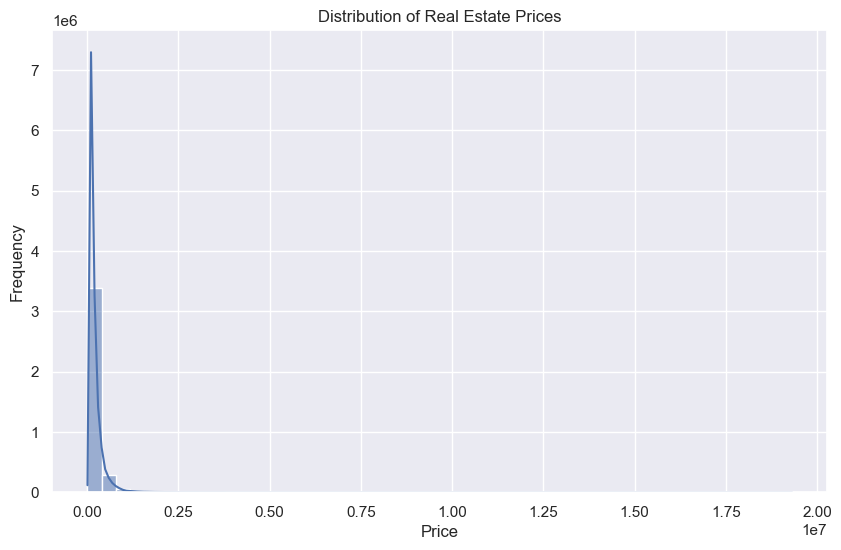

In [203]:
# Histogram of real estate prices
plt.figure(figsize=(10, 6))
sns.histplot(df_long['Price'], bins=50, kde=True)
plt.title('Distribution of Real Estate Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Interpretation:

Skewness: The histogram is heavily right-skewed (positively skewed). This means that most of the real estate prices are clustered towards the lower end of the price spectrum, with a long tail extending towards higher prices.

Outliers: There are a few outliers with very high prices, which are responsible for the long tail on the right side of the histogram.

Concentration of Prices: The majority of the real estate prices are concentrated at the lower end, indicating that lower-priced properties are more common in the dataset.

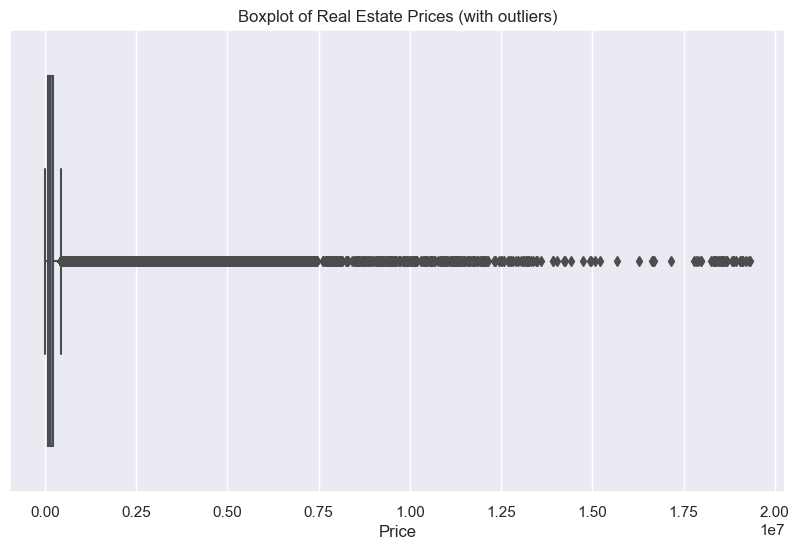

In [204]:
# Plotting the boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_long['Price'])
plt.title('Boxplot of Real Estate Prices (with outliers)')
plt.xlabel('Price')
plt.show()

Median: The thick horizontal line within the box represents the median of the real estate prices. This is the midpoint of the data, where 50% of the values are below this point and 50% are above.

Interquartile Range (IQR): The box itself represents the interquartile range, which contains the middle 50% of the data. The bottom and top edges of the box correspond to the 25th percentile (Q1) and 75th percentile (Q3) of the data, respectively.

Whiskers: The lines extending from the top and bottom of the box (whiskers) represent the range within 1.5 times the IQR from the Q1 and Q3. This is a common way to detect potential outliers.

Outliers: The points beyond the whiskers are considered outliers. These are the data points that fall outside 1.5 times the IQR from the Q1 and Q3. The plot shows a significant number of outliers on the higher end of the price spectrum, indicating that there are many properties with prices much higher than the typical range.

Skewness: The presence of many outliers on the higher end suggests a positive skew in the data. This confirms the right-skewness observed in the histogram previously.


Next steps

Investigate Outliers: Identify and investigate these outliers to understand the characteristics of these high-priced properties. Determine if they should be included or excluded from further analysis based on their impact on the results.


Compare with and without Outliers: Conduct analysis both including and excluding the outliers to understand their impact on the overall analysis and conclusions.

In [205]:
#Checking for Outliers using IQR

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_long['Price'].quantile(0.25)
Q3 = df_long['Price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the outlier cutoff
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_long[(df_long['Price'] < lower_bound) | (df_long['Price'] > upper_bound)]

# Print the number of outliers and some examples
print(f"Number of outliers: {len(outliers)}")
outliers.head()


Number of outliers: 287913


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Annualized_ROI,Price
Date,,,,,,,,,
1996-04,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,8.96,709500.00
1996-04,96150,90403,Santa Monica,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2071,8.51,461900.00
1996-04,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,85,8.41,480200.00
1996-04,97571,94117,San Francisco,CA,San Francisco,San Francisco,897,8.35,481000.00
1996-04,96050,90069,West Hollywood,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1897,8.28,533600.00


We didnot remove outliers...

In [206]:
# Convert the 'Price' column to numeric, forcing non-numeric values to NaN
df_long['Price'] = pd.to_numeric(df_long['Price'], errors='coerce')


# Set pandas display options to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Print summary statistics including outliers
print("Summary statistics including outliers:")
print(df_long['Price'].describe())

Summary statistics including outliers:
count    3746040.00
mean      208467.16
std       247276.59
min        11400.00
25%        98400.00
50%       148200.00
75%       237300.00
max     19314900.00
Name: Price, dtype: float64


In [207]:
df_long.describe()

,RegionID,RegionName,SizeRank,Annualized_ROI,Price
count,3746040.00,3746040.00,3746040.00,3746040.00,3746040.00
mean,80960.47,47751.13,7228.09,3.18,208467.16
std,32524.42,29516.42,4249.39,2.23,247276.59
min,58196.00,1001.00,1.00,-3.35,11400.00
25%,66842.50,21223.50,3541.75,2.43,98400.00
50%,77653.00,45322.50,7130.50,3.37,148200.00
75%,90766.75,75083.25,10887.50,4.33,237300.00
max,753844.00,99901.00,14723.00,11.85,19314900.00


In [208]:
df = df_long
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Annualized_ROI,Price
Date,,,,,,,,,
1996-04,62022,11211,New York,NY,New York,Kings,118,11.85,133200.00
1996-04,62033,11222,New York,NY,New York,Kings,1156,11.57,149200.00
1996-04,62027,11216,New York,NY,New York,Kings,476,11.31,146100.00
1996-04,60639,7302,Jersey City,NJ,New York,Hudson,192,11.06,137200.00
1996-04,62026,11215,New York,NY,New York,Kings,107,10.83,225700.00
...,...,...,...,...,...,...,...,...,...
2018-04,94323,83821,Coolin,ID,Sandpoint,Bonner,14704,-3.35,540400.00
2018-04,79929,49768,Paradise,MI,Sault Ste. Marie,Chippewa,14706,-3.35,86700.00
2018-04,59046,3215,Waterville Valley,NH,Claremont,Grafton,14707,-3.35,796600.00


In [209]:
df.shape

(3746040, 9)

In [210]:
df.dtypes

RegionID            int64
RegionName          int64
City               object
State              object
Metro              object
CountyName         object
SizeRank            int64
Annualized_ROI    float64
Price             float64
dtype: object

Histogram Interpretation with Summary Statistics


### Univariate Analysis

#### City

This plot shows the top 20 most frequent cities in the dataset.

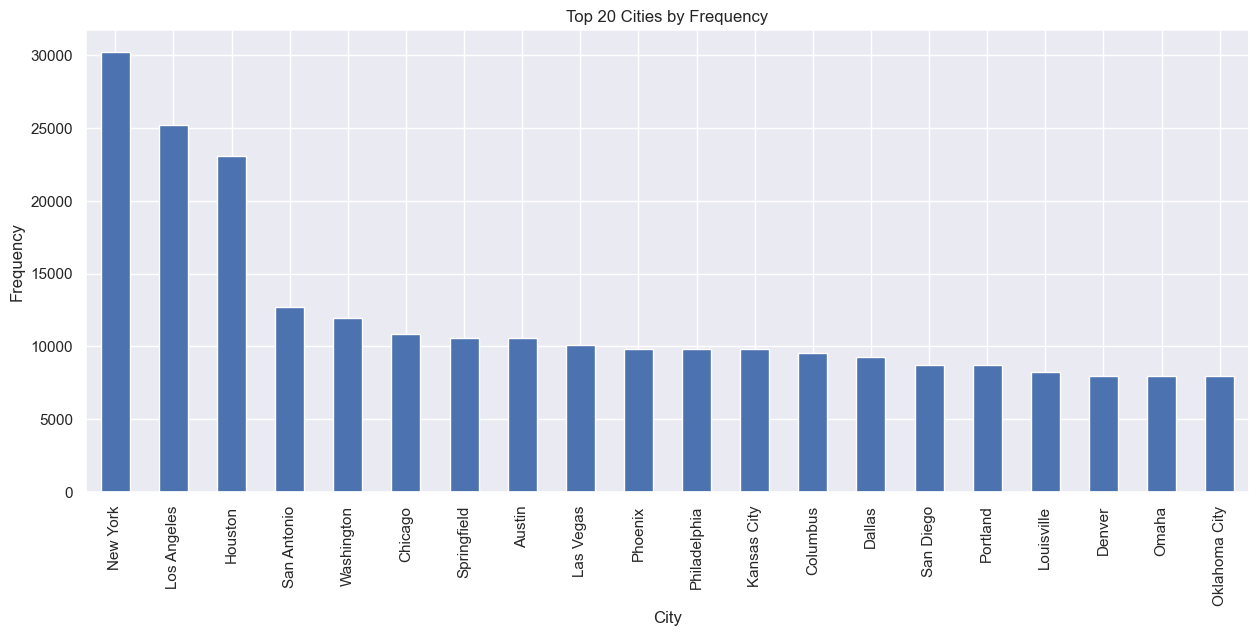

In [211]:
# Unique values and frequency
city_counts = df['City'].value_counts()

# Plotting the frequency of City
plt.figure(figsize=(15, 6))
city_counts.head(20).plot(kind='bar')
plt.title('Top 20 Cities by Frequency')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

#### State

This plot shows the frequency of each state in the dataset.

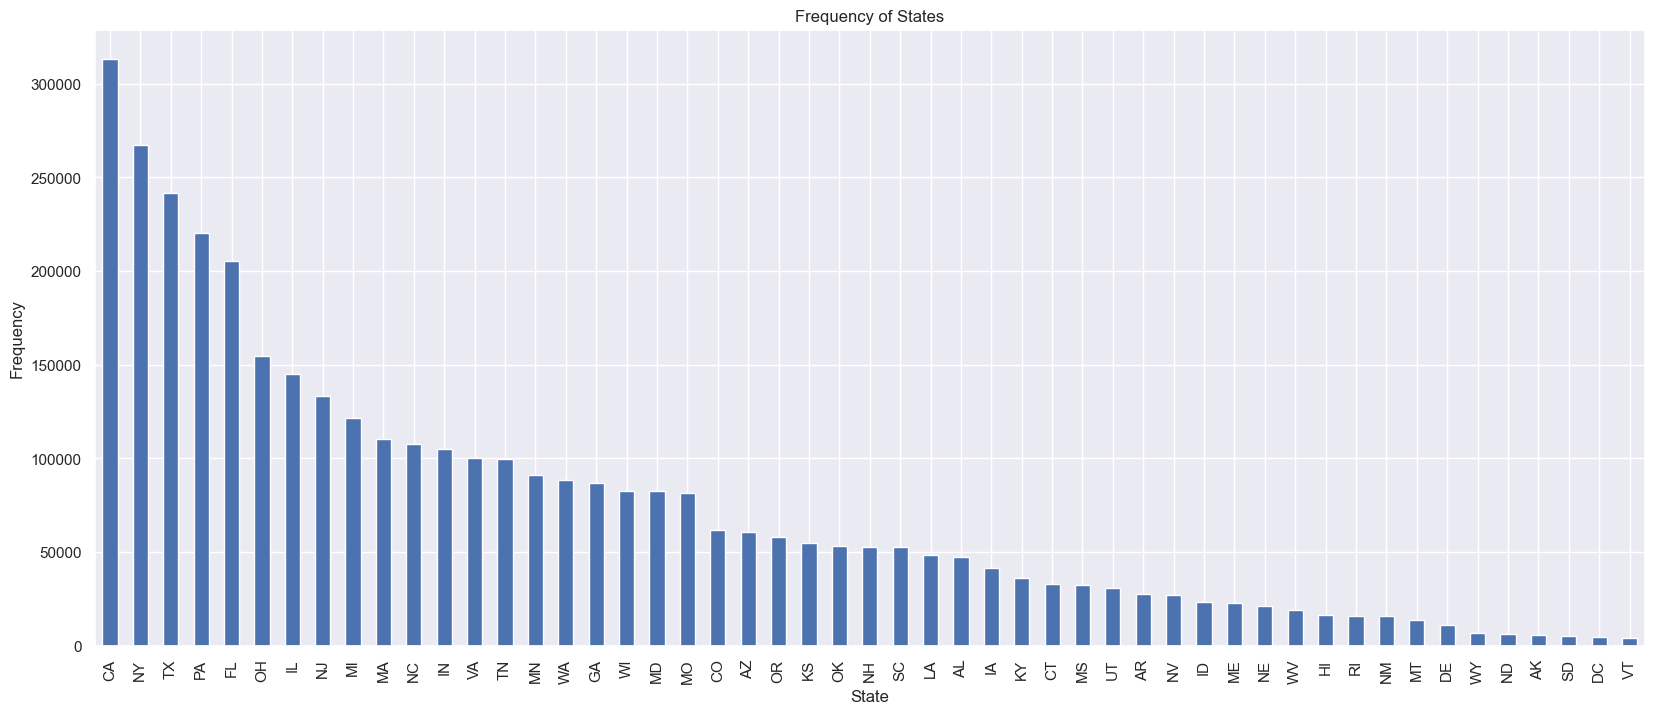

In [212]:
# Unique values and frequency
state_counts = df['State'].value_counts()

# Plotting the frequency of State
plt.figure(figsize=(20, 8))
state_counts.plot(kind='bar')
plt.title('Frequency of States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()


#### Metro

This plot shows the top 20 most frequent metro areas in the dataset.

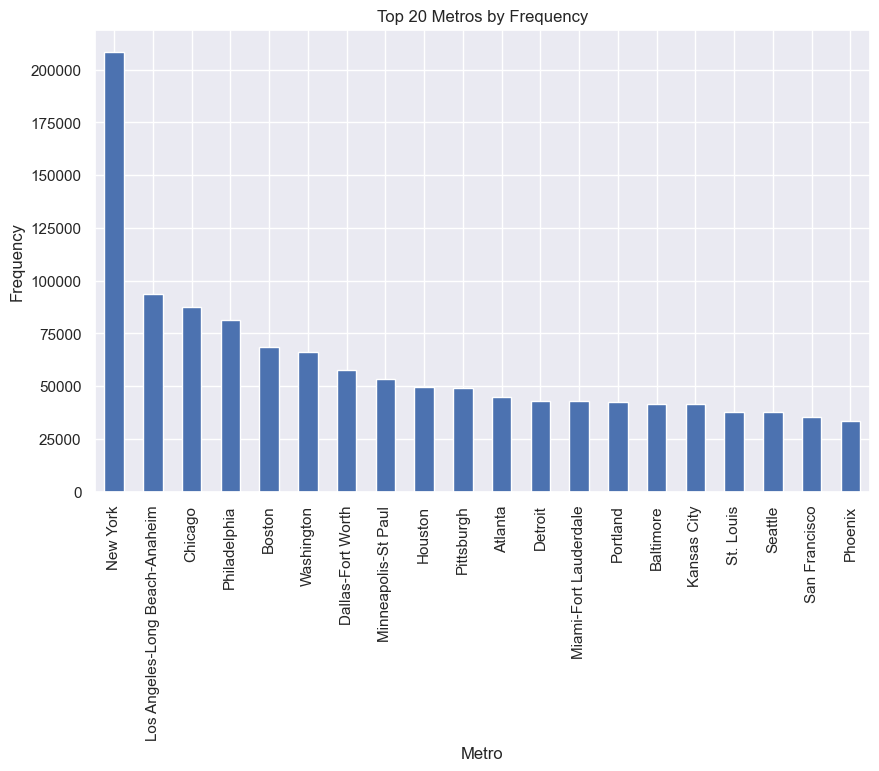

In [213]:
# Unique values and frequency
metro_counts = df['Metro'].value_counts()

# Plotting the frequency of Metro
plt.figure(figsize=(10, 6))
metro_counts.head(20).plot(kind='bar')
plt.title('Top 20 Metros by Frequency')
plt.xlabel('Metro')
plt.ylabel('Frequency')
plt.show()


#### County Name

This plot shows the top 20 most frequent counties in the dataset.

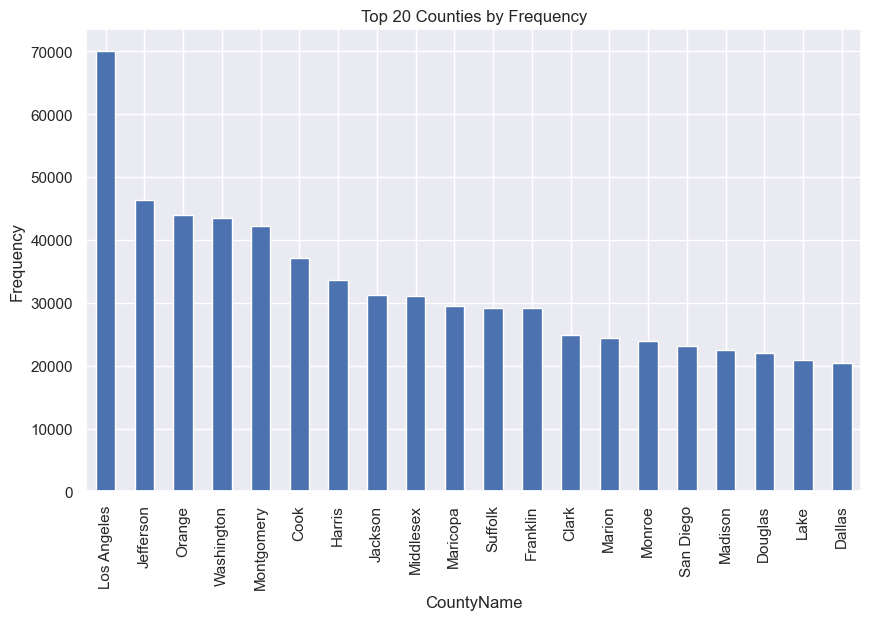

In [214]:
# Unique values and frequency
county_counts = df['CountyName'].value_counts()

# Plotting the frequency of CountyName
plt.figure(figsize=(10, 6))
county_counts.head(20).plot(kind='bar')
plt.title('Top 20 Counties by Frequency')
plt.xlabel('CountyName')
plt.ylabel('Frequency')
plt.show()


#### Distribution of the ROI

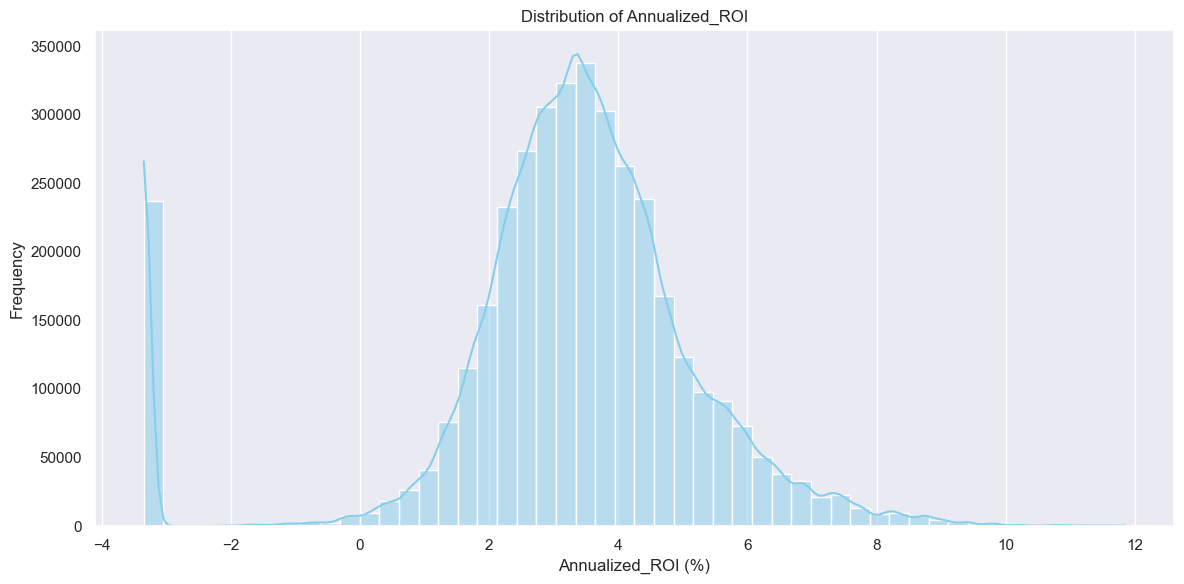

In [215]:
# Plot the distribution of Annualized_ROI
plt.figure(figsize=(12, 6))
sns.histplot(df['Annualized_ROI'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Annualized_ROI')
plt.xlabel('Annualized_ROI (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

This means the areas we are focusing on are at the extreme end of the distribution as they have more than 10% ROI

### Bivariate Analysis

#### Anualised ROI by state

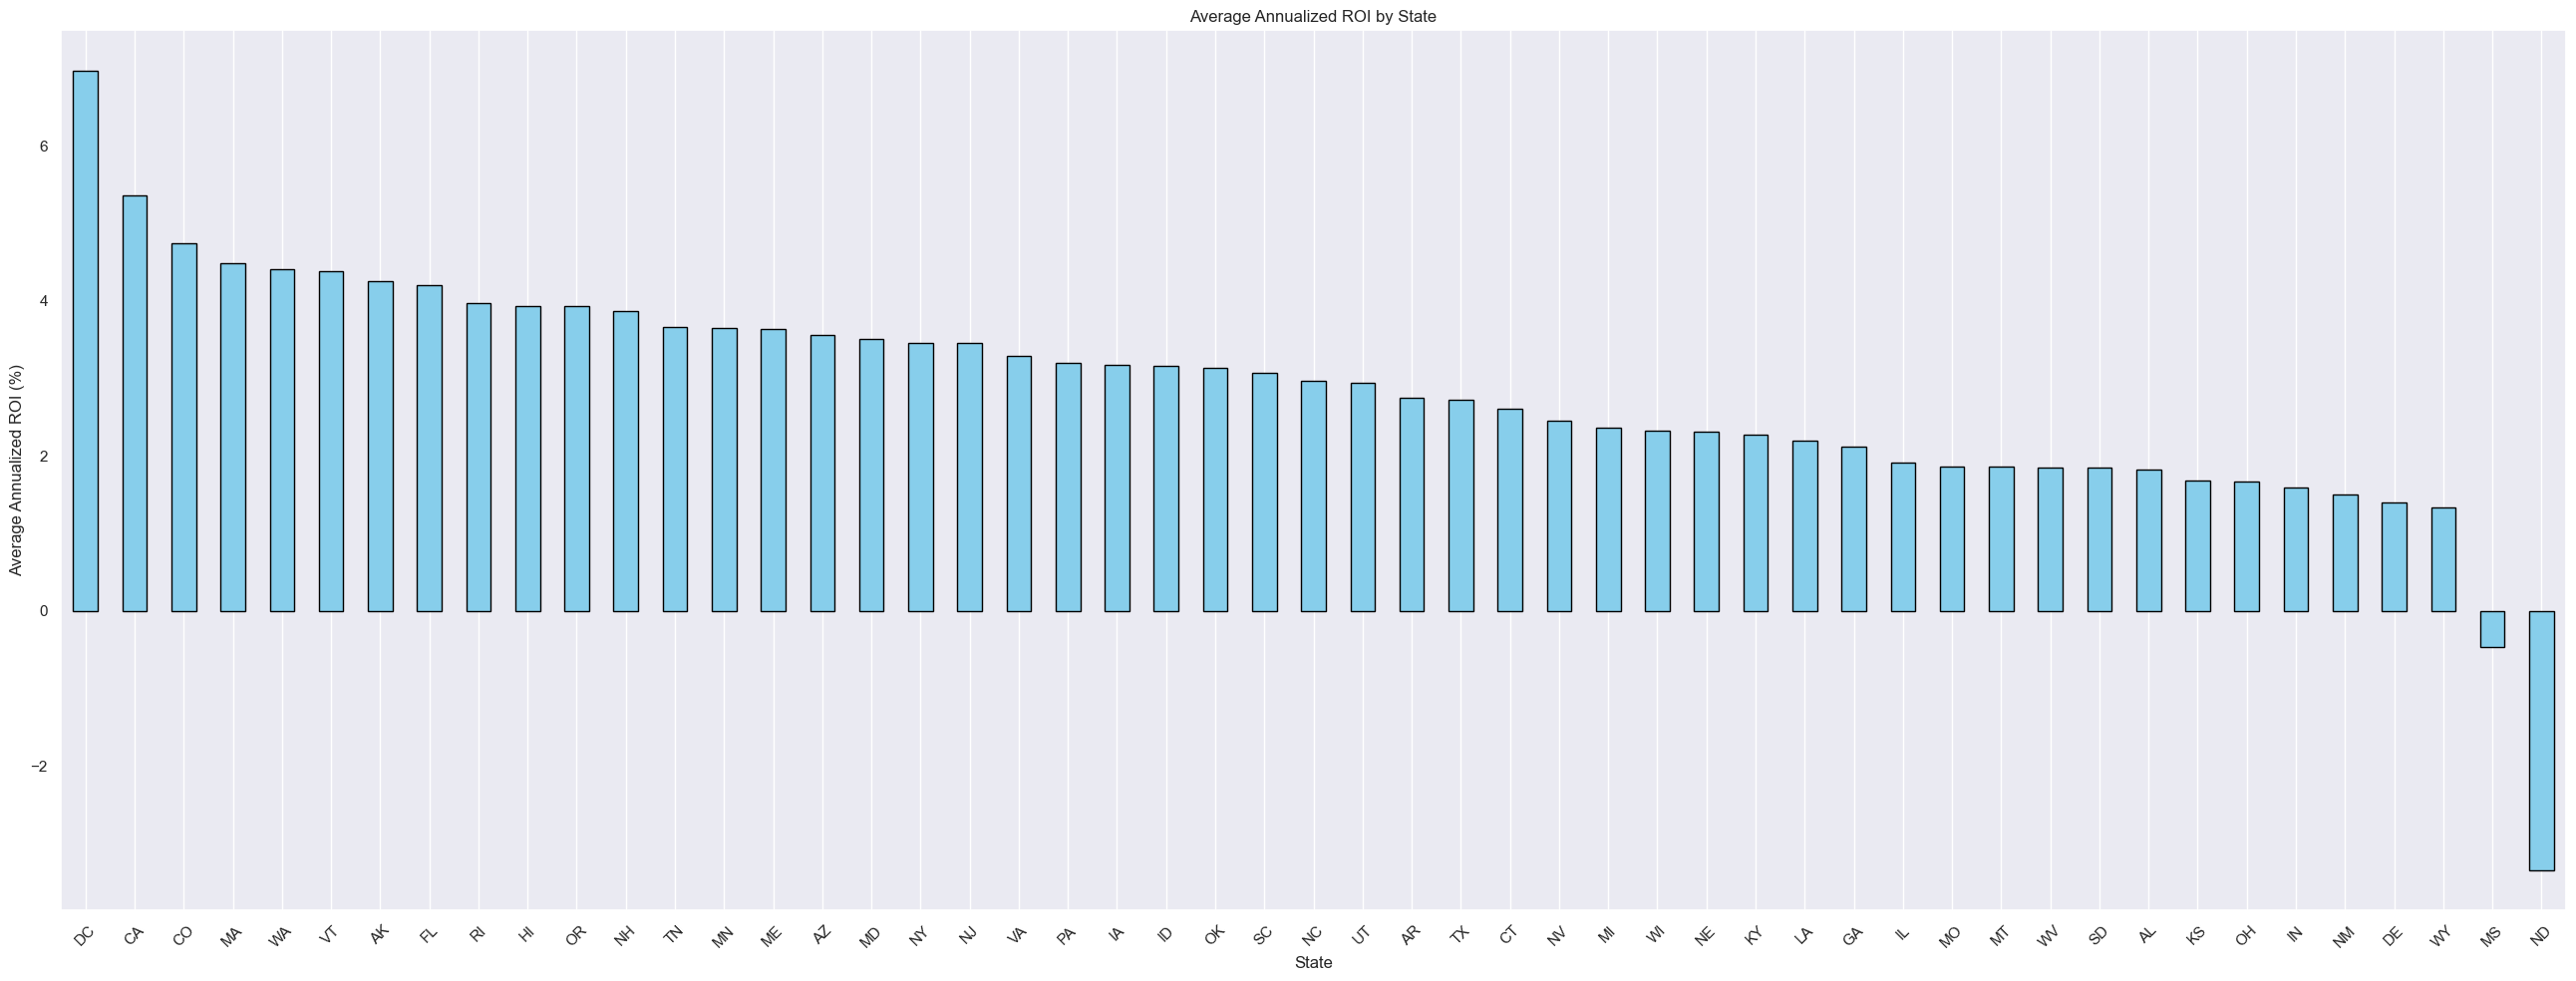

In [216]:
# Calculate the average Annualized_ROI by state
avg_roi_by_state = df.groupby('State')['Annualized_ROI'].mean().sort_values(ascending=False)

# Plot the average Annualized_ROI by state
plt.figure(figsize=(26, 10))
avg_roi_by_state.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Annualized ROI by State')
plt.ylabel('Average Annualized ROI (%)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

The **District of Columbia (DC)** leads with the highest average of Annualized ROI. There is a noticeable variance in average ROI across states, with some states having ROIs above 4% and others below 2%.

#### Annualized ROI by RegionName/Zipcodes

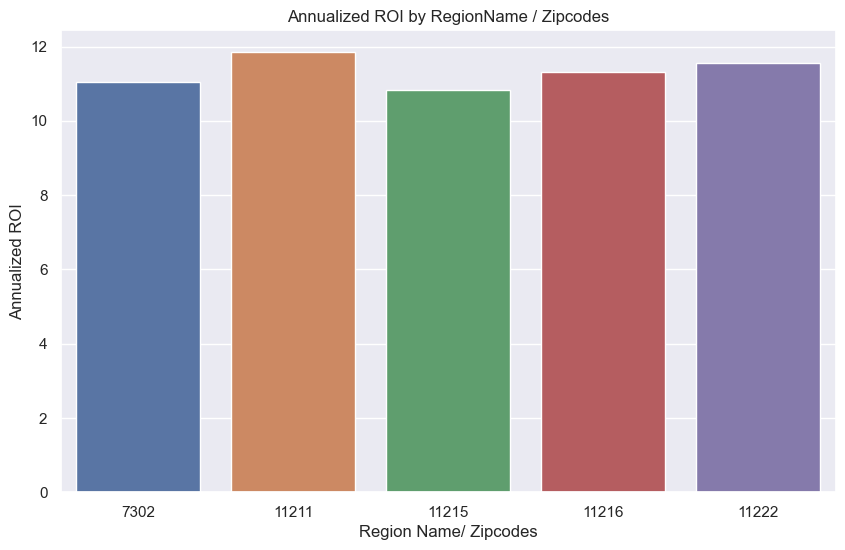

In [217]:
# create a visualization of the RegionName and the ROI

# Extract first 5 rows and selected columns
sub_df = df.head(5)[['RegionName', 'Annualized_ROI']]

# sub_df = sorted_annualized_roi_df.loc[:4, ['RegionName', 'Annualized_ROI']]

# Create bar graph using Seaborn
sns.barplot(x='RegionName', y='Annualized_ROI', data=sub_df)
sns.set(rc={"figure.figsize":(10, 6)})
plt.xlabel('Region Name/ Zipcodes')
plt.ylabel('Annualized ROI')
plt.title('Annualized ROI by RegionName / Zipcodes')
plt.show()

Check for uniqe zipcodes

In [218]:
#(RegionID-62022, RegionName-11211, City-NewYork, State-NY, Metro-NewYork, CountyName - Kings)
selected_zipcode = df.iloc[0]
selected_zipcode

RegionID             62022
RegionName           11211
City              New York
State                   NY
Metro             New York
CountyName           Kings
SizeRank               118
Annualized_ROI       11.85
Price            133200.00
Name: 1996-04, dtype: object

#### Price vs City

This plot shows the top 20 cities by average price, highlighting cities with the highest housing prices.

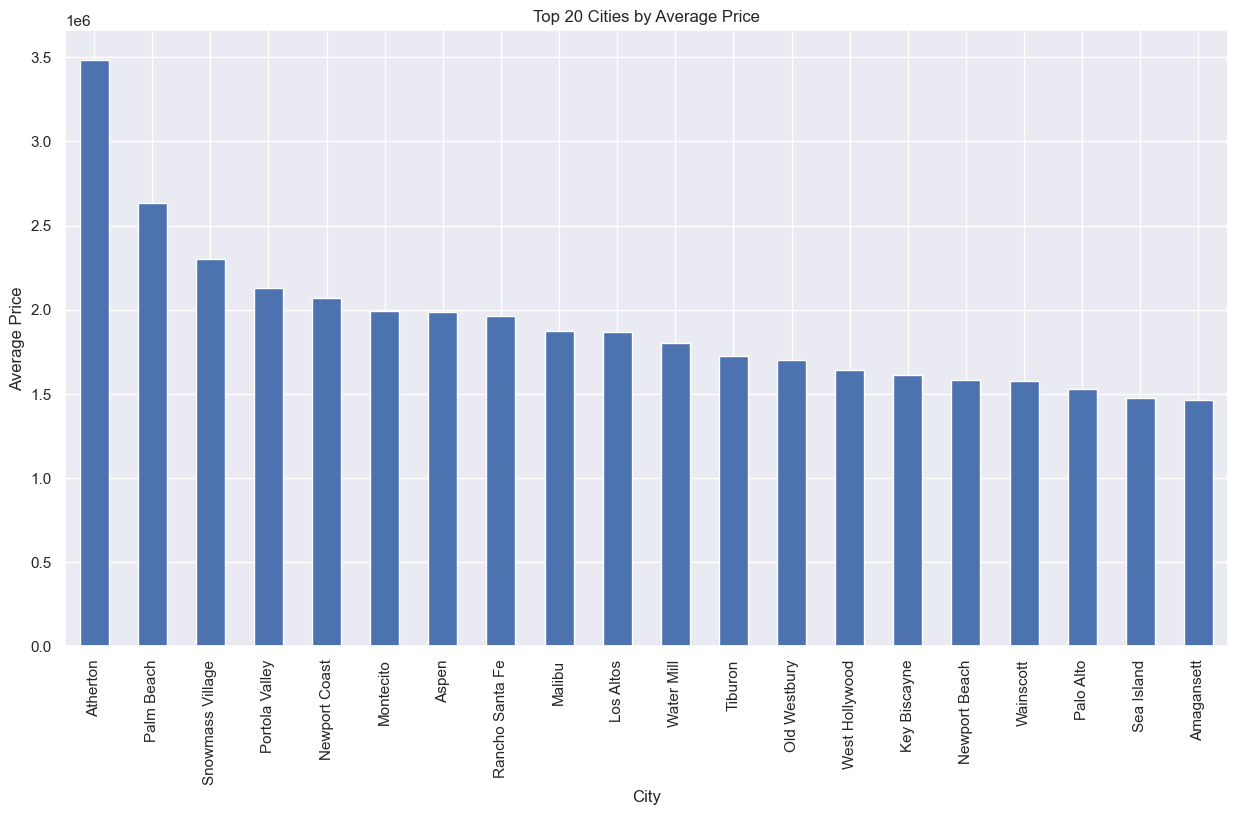

In [219]:
# Aggregating average price by City
city_price = df.groupby('City')['Price'].mean().sort_values(ascending=False).head(20)

# Plotting the average price by City
plt.figure(figsize=(15, 8))
city_price.plot(kind='bar')
plt.title('Top 20 Cities by Average Price')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()


#### Price vs State

This plot shows the average price of houses in each state, revealing the states with higher housing prices.

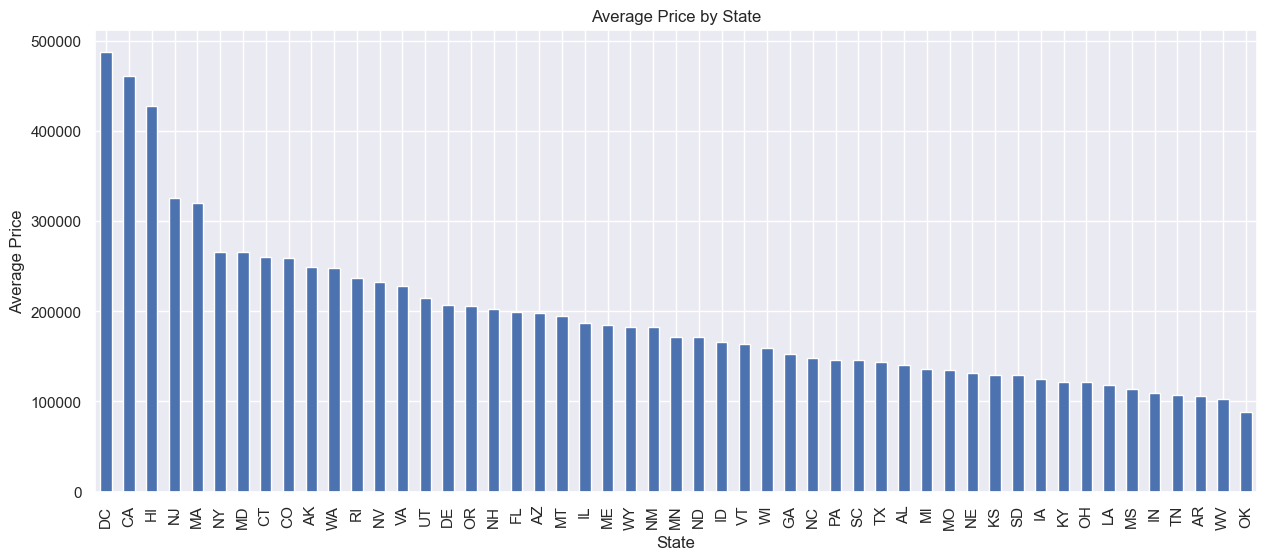

In [220]:
# Aggregating average price by State
state_price = df.groupby('State')['Price'].mean().sort_values(ascending=False)

# Plotting the average price by State
plt.figure(figsize=(15, 6))
state_price.plot(kind='bar')
plt.title('Average Price by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.show()


#### Price vs Metro

This plot shows the top 20 metro areas by average price, indicating which metro areas have the highest housing prices.

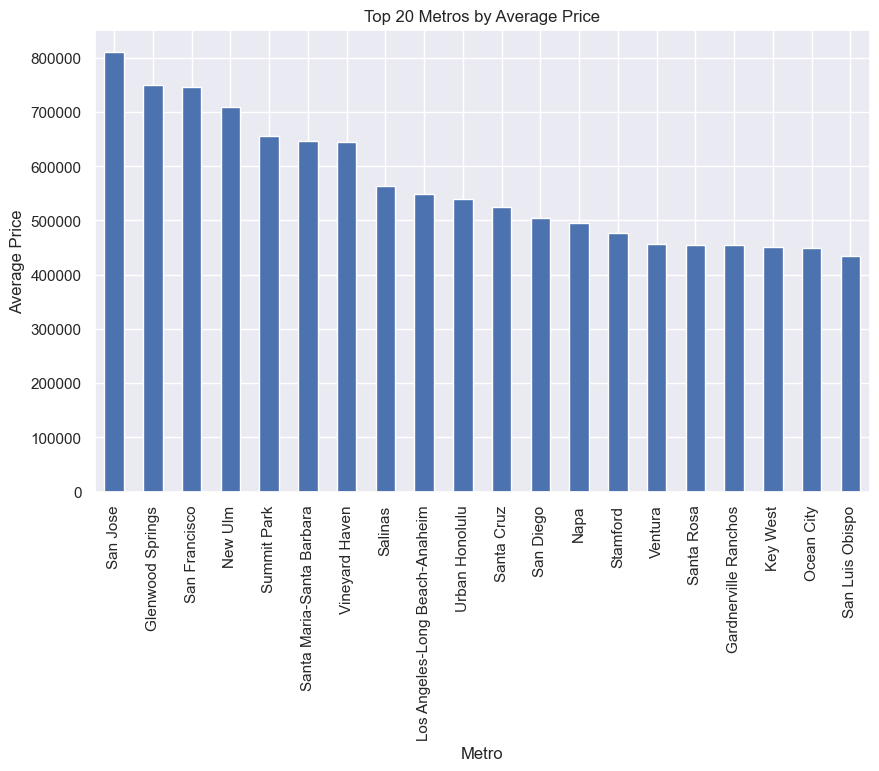

In [221]:
# Aggregating average price by Metro
metro_price = df.groupby('Metro')['Price'].mean().sort_values(ascending=False).head(20)

# Plotting the average price by Metro
plt.figure(figsize=(10, 6))
metro_price.plot(kind='bar')
plt.title('Top 20 Metros by Average Price')
plt.xlabel('Metro')
plt.ylabel('Average Price')
plt.show()


#### Price vs County Name

This plot shows the top 20 counties by average price, highlighting the counties with the highest housing prices.

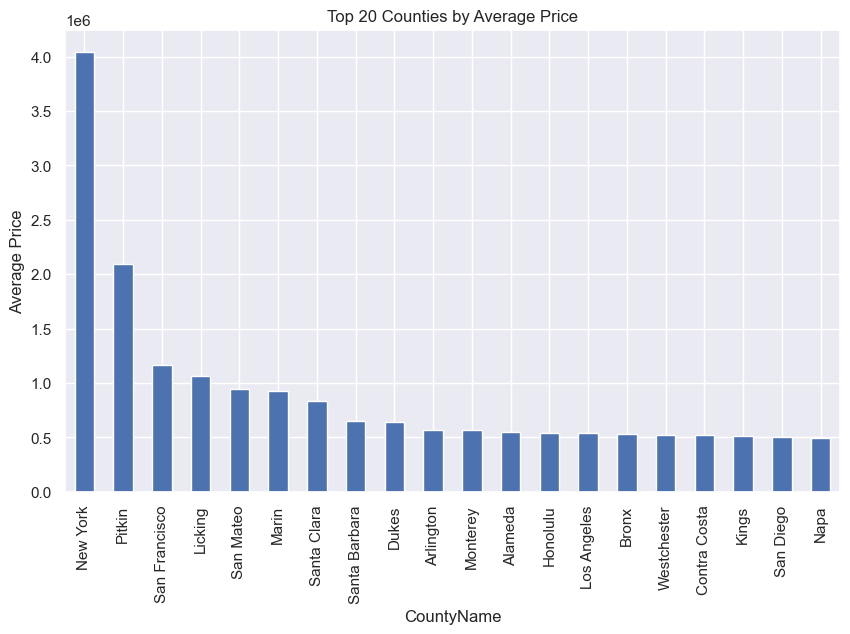

In [222]:
# Aggregating average price by CountyName
county_price = df.groupby('CountyName')['Price'].mean().sort_values(ascending=False).head(20)

# Plotting the average price by CountyName
plt.figure(figsize=(10, 6))
county_price.plot(kind='bar')
plt.title('Top 20 Counties by Average Price')
plt.xlabel('CountyName')
plt.ylabel('Average Price')
plt.show()


#### Price vs Size Rank

This scatter plot shows the relationship between Price and SizeRank. It helps to identify any trends or patterns, such as whether higher-ranked regions have higher or lower prices.

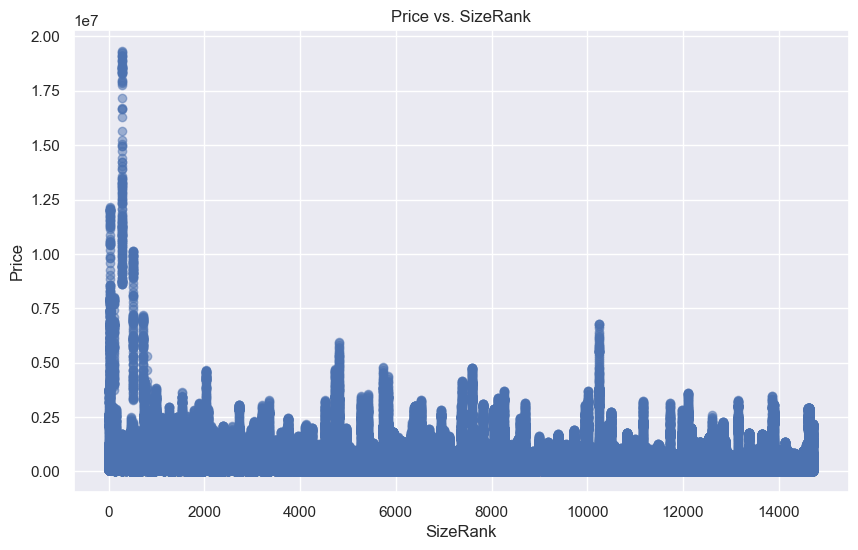

In [223]:
# Scatter plot of Price vs. SizeRank
plt.figure(figsize=(10, 6))
plt.scatter(df['SizeRank'], df['Price'], alpha=0.5)
plt.title('Price vs. SizeRank')
plt.xlabel('SizeRank')
plt.ylabel('Price')
plt.show()


#### Price vs Date

This line plot shows the trend of average housing prices over time, highlighting any increases or decreases in prices.

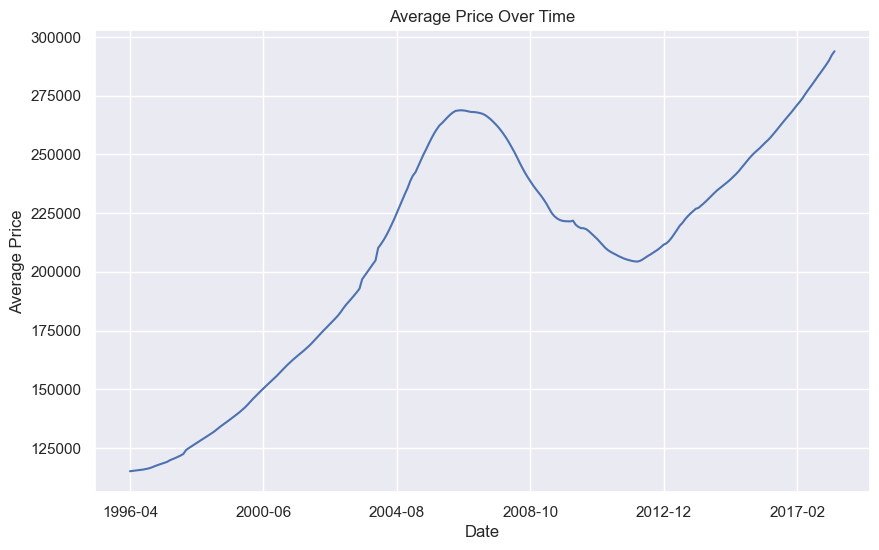

In [224]:
# Aggregating average price by Date
date_price = df.groupby('Date')['Price'].mean()

# Plotting the average price by Date
plt.figure(figsize=(10, 6))
date_price.plot(kind='line')
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()


#### Correlation Matrix


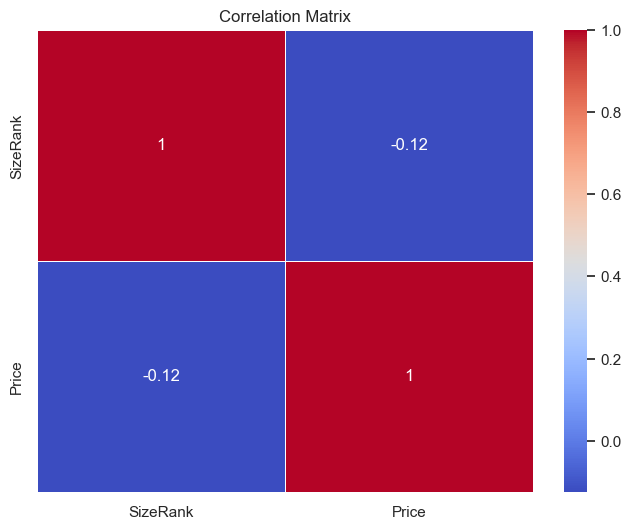

In [225]:
# Correlation matrix for numerical columns
correlation_matrix = df[['SizeRank', 'Price']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



Correlation Strength:

The correlation between SizeRank and Price is weakly negative (-0.12). This suggests that as the size rank of a region increases (indicating a smaller or less significant region), the housing prices tend to decrease slightly, but the relationship is not strong.

Implications:

The weak negative correlation implies that SizeRank is not a strong predictor of Price. Other factors might have a more significant impact on housing prices.

Color Interpretation:

The colors in the heatmap confirm the numeric values, with blue indicating the negative correlation and red indicating the positive correlation along the diagonal.

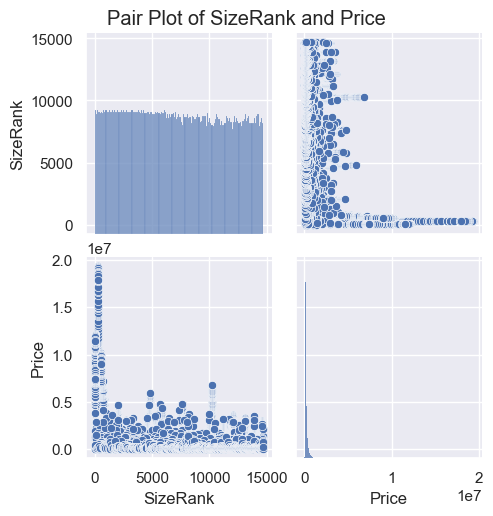

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of selected variables
sns.pairplot(df, vars=['SizeRank', 'Price'])
plt.suptitle('Pair Plot of SizeRank and Price', y=1.02)
plt.show()


Key Observations:

SizeRank Distribution: The SizeRank values are evenly distributed, indicating a wide range of region sizes in the dataset.
Price Distribution: The Price values are right-skewed, with most houses priced at the lower end of the spectrum and a few very high-priced houses.

Weak Negative Correlation: The scatter plots suggest a weak negative correlation between SizeRank and Price, meaning that larger regions (with lower SizeRank) tend to have higher prices, but the relationship is not strong.

Implications:
Data Transformation: For further analysis, particularly if you need a more normal distribution of prices, you might consider transforming the Price data (e.g., log transformation).

Further Analysis: Explore additional variables and their interactions to understand other factors influencing housing prices. The weak correlation between SizeRank and Price suggests that other variables might play a more significant role.

Next Steps:

Transform Data: Consider transforming the Price variable if normality is required for further statistical analysis.
Explore More Variables: Extend the analysis to include more variables (e.g., City, State, Metro, CountyName) to uncover more complex relationships.

Model Building: Use the insights from this analysis to build predictive models, incorporating multiple variables to predict housing prices.

### Multivariate Analysis

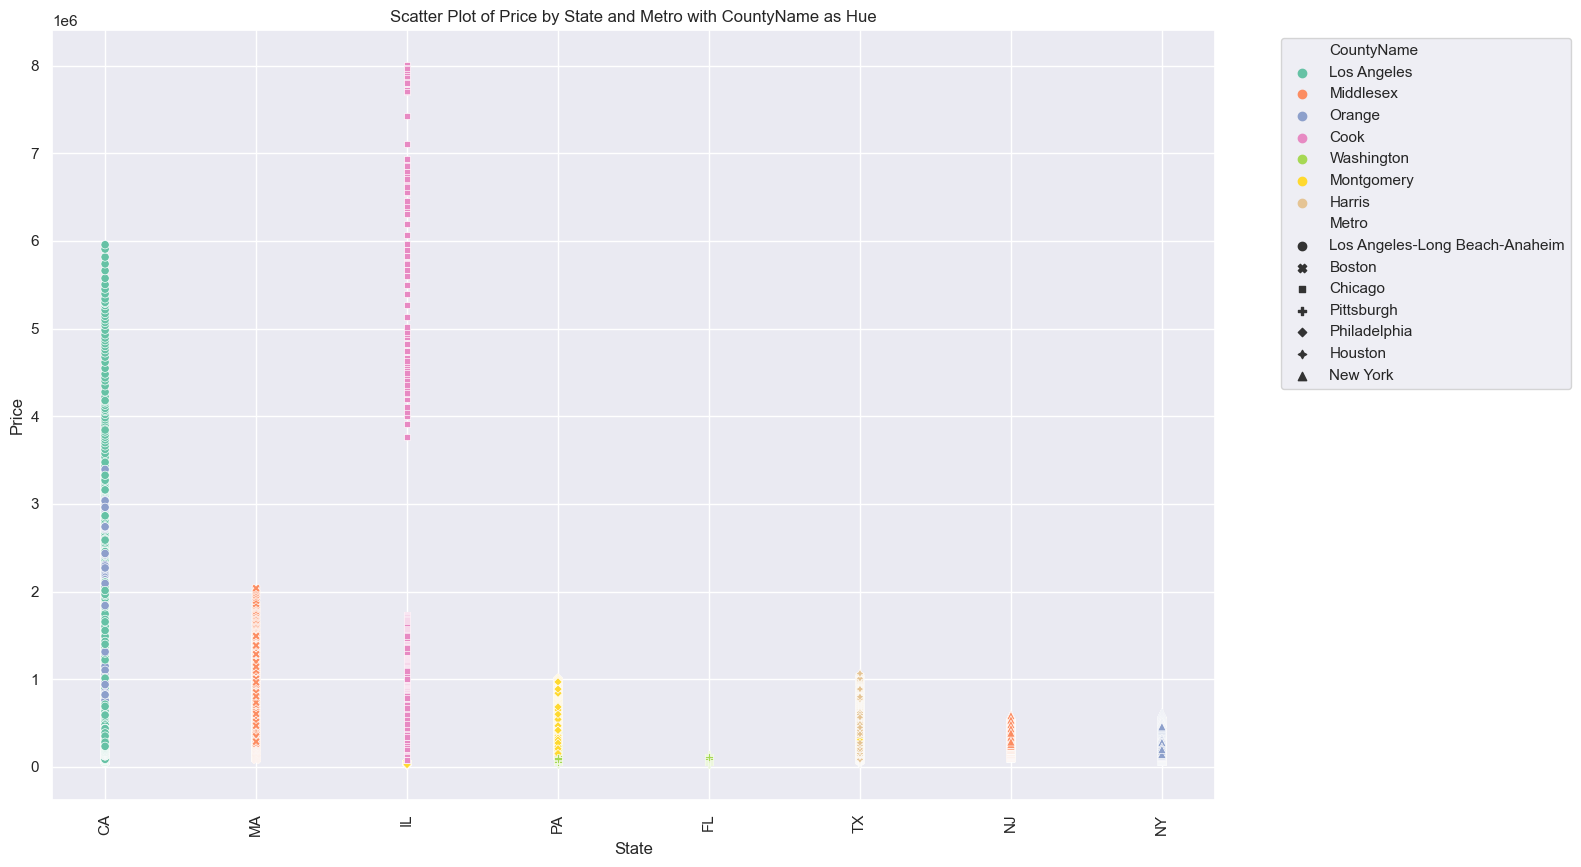

In [227]:
# To avoid overcrowding the plot, we can filter the data to include only the top categories
top_states = df['State'].value_counts().index[:10]  # Top 10 states
top_metros = df['Metro'].value_counts().index[:10]  # Top 10 metros
top_counties = df['CountyName'].value_counts().index[:10]  # Top 10 counties

# Filter the dataframe
df_filtered = df[df['State'].isin(top_states) & df['Metro'].isin(top_metros) & df['CountyName'].isin(top_counties)]

# Plot Price against State and Metro with CountyName as hue
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_filtered, x='State', y='Price', hue='CountyName', style='Metro', palette='Set2')
plt.title('Scatter Plot of Price by State and Metro with CountyName as Hue')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()

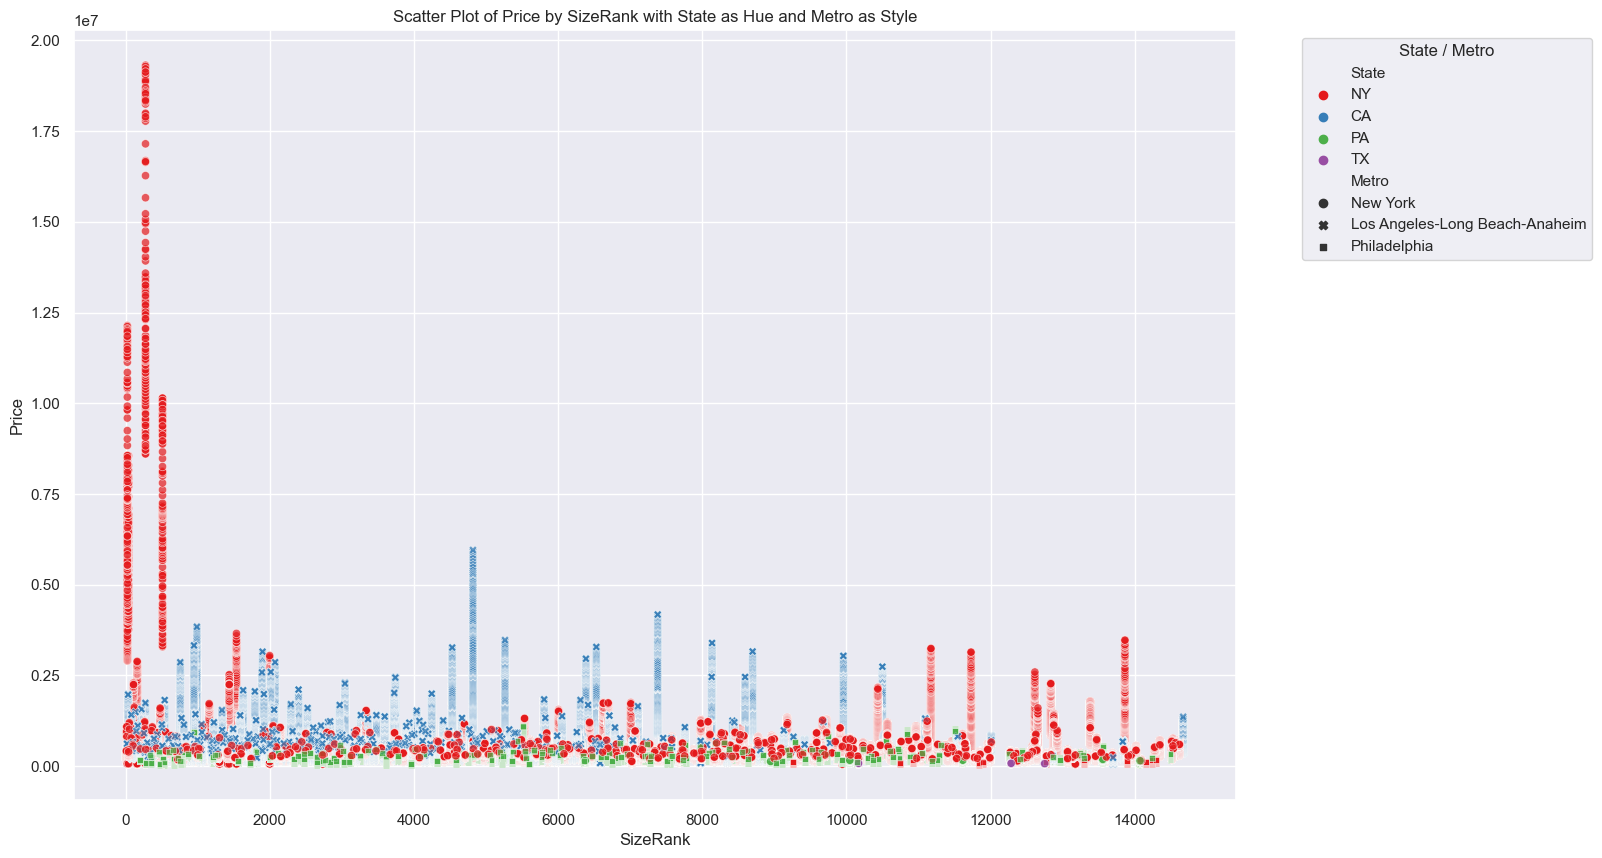

In [228]:
# To avoid overcrowding the plot, we can filter the data to include only the top categories
top_states = df['State'].value_counts().index[:5]  # Top 10 states
top_metros = df['Metro'].value_counts().index[:5]  # Top 10 metros

# Filter the dataframe
df_filtered = df[df['State'].isin(top_states) & df['Metro'].isin(top_metros)]

# Plot Price against SizeRank with State as hue and Metro as style
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(data=df_filtered, x='SizeRank', y='Price', hue='State', style='Metro', palette='Set1', alpha=0.7)
plt.title('Scatter Plot of Price by SizeRank with State as Hue and Metro as Style')
plt.xlabel('SizeRank')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='State / Metro')
plt.show()

In [229]:
# # Ensure the 'Date' column is in datetime format
# data.index = pd.to_datetime(data.index)

# # Create a new column 'Year' by extracting the year from the 'Date' column
# data['Year'] = data.index.year

In [230]:
df.index = pd.to_datetime(df.index)
# Add the year column
df['year'] = df.index.year

In [231]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Annualized_ROI,Price,year
Date,,,,,,,,,,
1996-04-01,62022,11211,New York,NY,New York,Kings,118,11.85,133200.00,1996
1996-04-01,62033,11222,New York,NY,New York,Kings,1156,11.57,149200.00,1996
1996-04-01,62027,11216,New York,NY,New York,Kings,476,11.31,146100.00,1996
1996-04-01,60639,7302,Jersey City,NJ,New York,Hudson,192,11.06,137200.00,1996
1996-04-01,62026,11215,New York,NY,New York,Kings,107,10.83,225700.00,1996
...,...,...,...,...,...,...,...,...,...,...
2018-04-01,94323,83821,Coolin,ID,Sandpoint,Bonner,14704,-3.35,540400.00,2018
2018-04-01,79929,49768,Paradise,MI,Sault Ste. Marie,Chippewa,14706,-3.35,86700.00,2018
2018-04-01,59046,3215,Waterville Valley,NH,Claremont,Grafton,14707,-3.35,796600.00,2018


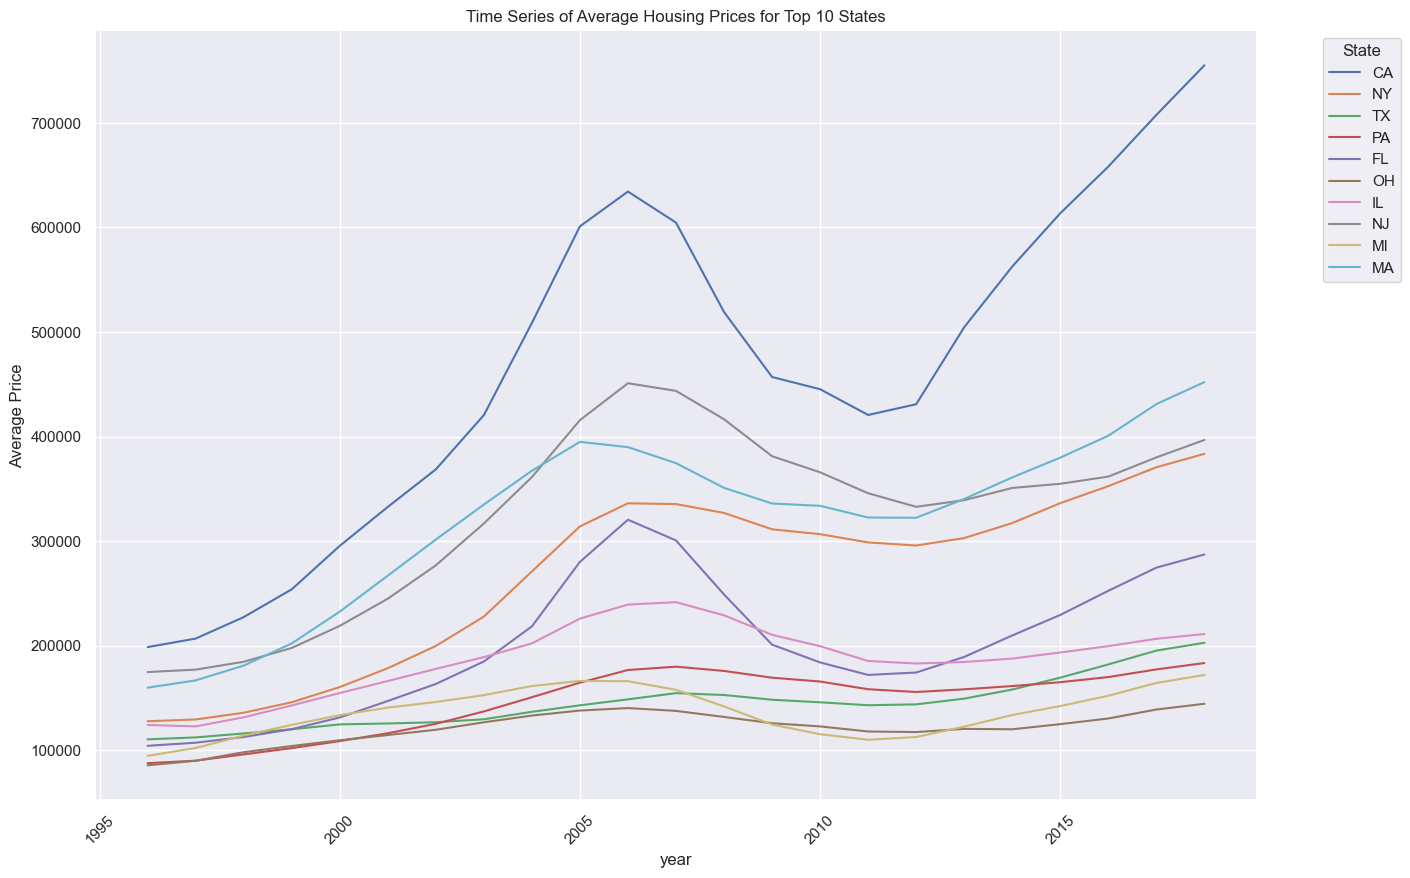

In [232]:
# Identify the top 10 states by frequency
top_states = df['State'].value_counts().index[:10]

# Filter the data to include only the top 10 states
df_filtered = df[df['State'].isin(top_states)]

# Aggregate the Price data by State and Date
df_agg = df_filtered.groupby(['year', 'State'])['Price'].mean().unstack()

# Plot the time series data for each of the top 10 states
plt.figure(figsize=(15, 10))

for state in top_states:
    plt.plot(df_agg.index, df_agg[state], label=state)

plt.title('Time Series of Average Housing Prices for Top 10 States')
plt.xlabel('year')
plt.ylabel('Average Price')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In 2006, the housing market in the United States experienced significant developments that marked the beginning of a broader financial crisis. Key events and trends include:

Housing Bubble Peak: By 2006, housing prices had reached their peak after years of rapid growth driven by low interest rates, easy credit, and speculative investment.

Subprime Mortgage Boom: A significant portion of home loans issued during this period were subprime mortgages, which were given to borrowers with poor credit histories. These loans often had adjustable rates that started low but could increase significantly.

Increase in Foreclosures: As the adjustable rates on these subprime mortgages began to reset to higher levels, many homeowners found themselves unable to afford their mortgage payments, leading to a sharp increase in foreclosures.

Decline in Home Prices: By mid-2006, home prices began to decline. This decline was exacerbated by the rising number of foreclosures, which increased the supply of homes on the market and further drove down prices.

Credit Crunch: As mortgage defaults increased, financial institutions that had invested heavily in mortgage-backed securities faced significant losses. This led to a tightening of credit as lenders became more cautious, making it harder for even creditworthy borrowers to obtain loans.

These factors combined to trigger the housing market collapse, which played a significant role in the broader financial crisis that unfolded in the following years, culminating in the Great Recession of 2007-2009.

In [233]:
# df.to_csv(r'C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Phase IV\Phase4project\cleaned_zillow.csv', index=False)

### STATIONALITY TESTING

In [234]:
df = pd.read_csv(r"C:\Users\sonia.ojay\OneDrive - jubileekenya.com\Desktop\Phase 4 Project\cleaned_zillow.csv")

In [235]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Price,year
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.00,1996
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.00,1996
2,91982,77494,Katy,TX,Houston,Harris,3,210400.00,1996
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.00,1996
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.00,1996
...,...,...,...,...,...,...,...,...,...
3746035,62697,12720,Bethel,NY,Claremont,Sullivan,14718,117700.00,2018
3746036,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,209300.00,2018
3746037,59107,3293,Woodstock,NH,Claremont,Grafton,14720,225800.00,2018
3746038,75672,40404,Berea,KY,Richmond,Madison,14721,133400.00,2018


In [236]:
# Load data
df = pd.read_csv(r"C:\Users\sonia.ojay\OneDrive - jubileekenya.com\Desktop\Phase 4 Project\cleaned_zillow.csv", index_col=0)

# Reset the index to make 'year' a column
df.reset_index(inplace=True)

# Create the 'Date' column
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-04-01')

# Move the 'year' column to the end
df['year'] = df['year'].astype(str)
df = df[['Date'] + [col for col in df.columns if col != 'Date']]

# Set the 'Date' column as the new index
df.set_index('Date', inplace=True)

# Save the transformed DataFrame back to a CSV file
df.to_csv(r"C:\Users\sonia.ojay\OneDrive - jubileekenya.com\Desktop\Phase 4 Project\transformed_data.csv")


In [299]:
# load data
df = pd.read_csv(r"C:\Users\sonia.ojay\OneDrive - jubileekenya.com\Desktop\Phase 4 Project\transformed_data.csv")
df

,Date,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Price,year
0,1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.00,1996
1,1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.00,1996
2,1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.00,1996
3,1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.00,1996
4,1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.00,1996
...,...,...,...,...,...,...,...,...,...,...
3746035,2018-04-01,62697,12720,Bethel,NY,Claremont,Sullivan,14718,117700.00,2018
3746036,2018-04-01,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,209300.00,2018
3746037,2018-04-01,59107,3293,Woodstock,NH,Claremont,Grafton,14720,225800.00,2018
3746038,2018-04-01,75672,40404,Berea,KY,Richmond,Madison,14721,133400.00,2018


#### Principal Component Analysis (PCA)

PCA reduces the dimensionality of the data and helps in visualizing multivariate relationships.

In [301]:
df.head()

,Date,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Price,year
0,1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.00,1996
1,1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.00,1996
2,1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.00,1996
3,1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.00,1996
4,1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.00,1996


In [302]:
df.shape

(3746040, 10)

In [303]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns for PCA
numerical_columns = ['SizeRank', 'Price']

# Create a subset of df_final with only the numerical columns
df_numerical = df[numerical_columns]

# Normalize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numerical)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components you want
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame for principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df.index)


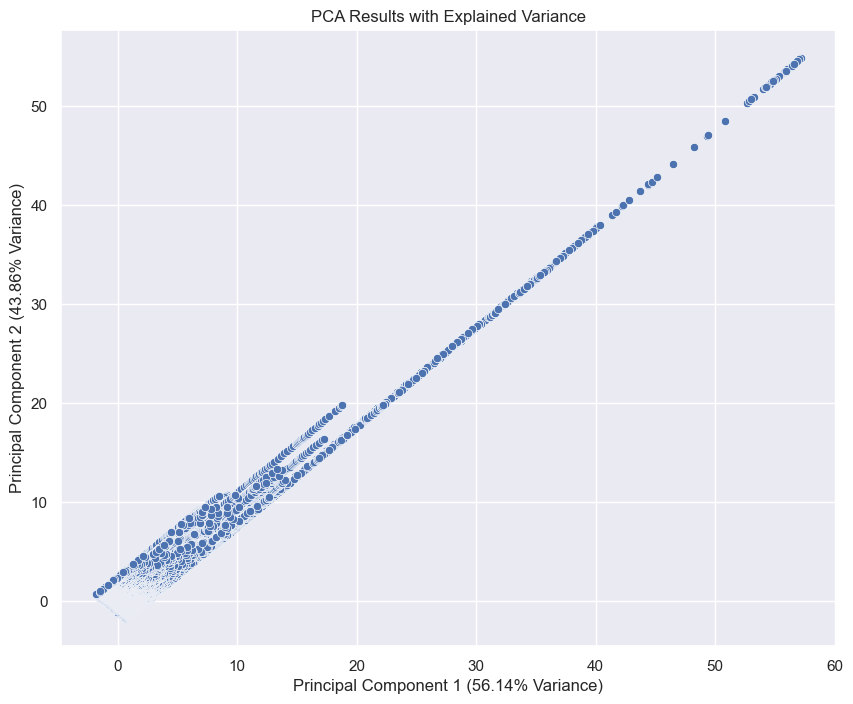

In [304]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting PCA results with explained variance
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA Results with Explained Variance')
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]*100:.2f}% Variance)')
plt.grid(True)
plt.show()

In [307]:
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')

# Get the principal components (loadings)
principal_components = pca.components_
components_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print('Principal Components (Loadings):')
print(components_df)

Explained variance ratio: [0.5613815 0.4386185]
Principal Components (Loadings):
    PC1  PC2
0 -0.71 0.71
1  0.71 0.71


PC1 explains approximately 56.14% of the total variance.
PC2 explains approximately 43.86% of the total variance.
Together, these two principal components explain around 100% of the variance (which is typical because they cover all dimensions of the original data).
The components_ attribute from PCA gives the directions (or loadings) of the principal components in terms of the original features.
The first principal component (PC1) has loadings where some features might have positive coefficients (+0.71) and others negative coefficients (-0.71).
High positive or negative values indicate that the features are strongly correlated in the direction of PC1.
PC1 captures the direction in the original feature space that maximizes the variance of the data.
PC2:

The second principal component (PC2) captures orthogonal (uncorrelated) variance from PC1.
It has loadings where some features might have positive and negative coefficients that differ from PC1, capturing additional variance not explained by PC1.

# Clustering

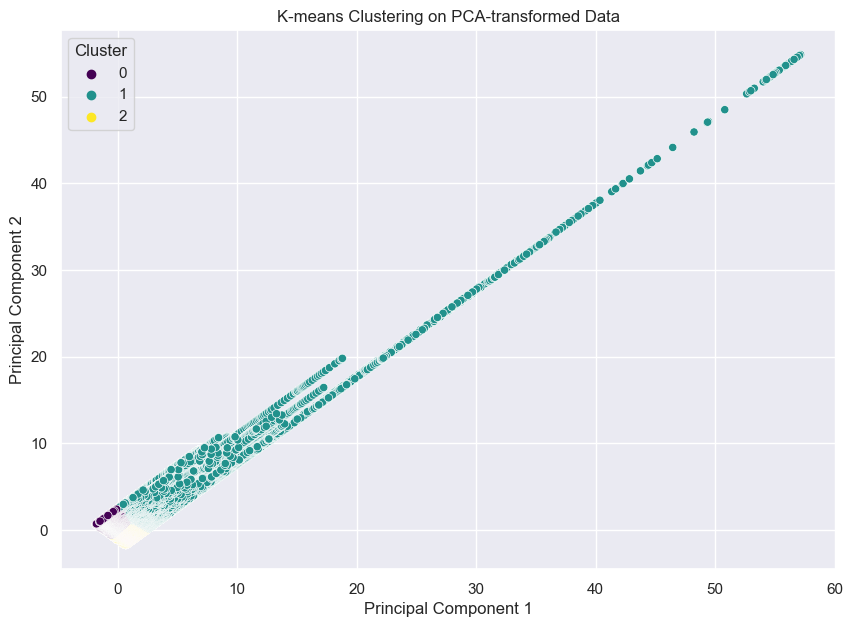

In [308]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Select the numerical variables for PCA
selected_columns = ['SizeRank', 'Price']
df_subset = df[selected_columns]

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_subset)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_standardized)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the number of clusters
kmeans.fit(df_pca)
df_pca['Cluster'] = kmeans.labels_

# Plot the clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('K-means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [309]:
from sklearn.cluster import KMeans

# Apply K-means clustering on the PCA results
num_clusters = 3  # Set the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

print("\nCluster Labels:")
print(df_pca['Cluster'].value_counts())


Cluster Labels:
1    1831613
0    1765222
2     149205
Name: Cluster, dtype: int64


Cluster 0: Contains 1,833,613 data points.
Cluster 1: Contains 1,765,222 data points.
Cluster 2: Contains 149,205 data points.
Interpretation:
Cluster Distribution: The clustering has resulted in three distinct clusters labeled as Cluster 0, Cluster 1, and Cluster 2.

Cluster Sizes:

Cluster 0 and Cluster 1 are significantly larger than Cluster 2, indicating that the majority of data points are grouped into these two clusters.
Cluster 2 is relatively smaller compared to Clusters 0 and 1, but still represents a notable subset of the data.

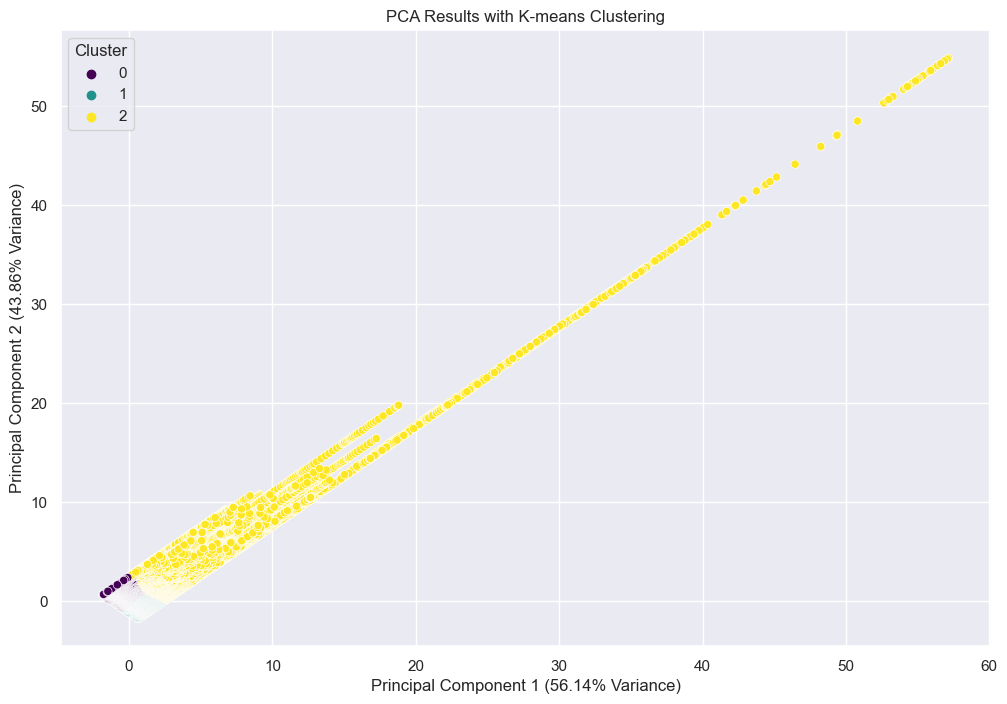

In [310]:
# Visualize the clusters on the PCA plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('PCA Results with K-means Clustering')
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]*100:.2f}% Variance)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Ensuring the index of df is unique before concatenating
df.reset_index(drop=True, inplace=True)

# Combine PCA components and cluster labels with the original dataset
df_combined = pd.concat([df, df_pca], axis=1)
df_combined

In [ ]:
# Save the df_combined DataFrame back to a CSV file
#df_combined.to_csv(r"C:\Users\sonia.ojay\OneDrive - jubileekenya.com\Desktop\Phase 4 Project\modelling.csv")

In [239]:
# lets load data for modelling
import pandas as pd
data = pd.read_csv(r"C:\Users\sonia.ojay\OneDrive - jubileekenya.com\Desktop\Phase 4 Project\modelling.csv")
data

,Unnamed: 0,index,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Price,year,PC1,PC2,Cluster,Date
0,0,0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.00,1996,-1.57,-0.84,0,1996-04-01
1,1,1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.00,1996,-1.28,-1.13,0,1996-04-01
2,2,2,91982,77494,Katy,TX,Houston,Harris,3,210400.00,1996,-1.20,-1.20,0,1996-04-01
3,3,3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.00,1996,-2.05,-0.36,0,1996-04-01
4,4,4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.00,1996,-0.81,-1.59,0,1996-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746035,3746035,3746035,62697,12720,Bethel,NY,Claremont,Sullivan,14718,117700.00,2018,1.52,0.98,1,2018-04-01
3746036,3746036,3746036,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,209300.00,2018,1.25,1.25,1,2018-04-01
3746037,3746037,3746037,59107,3293,Woodstock,NH,Claremont,Grafton,14720,225800.00,2018,1.20,1.29,1,2018-04-01
3746038,3746038,3746038,75672,40404,Berea,KY,Richmond,Madison,14721,133400.00,2018,1.47,1.02,1,2018-04-01


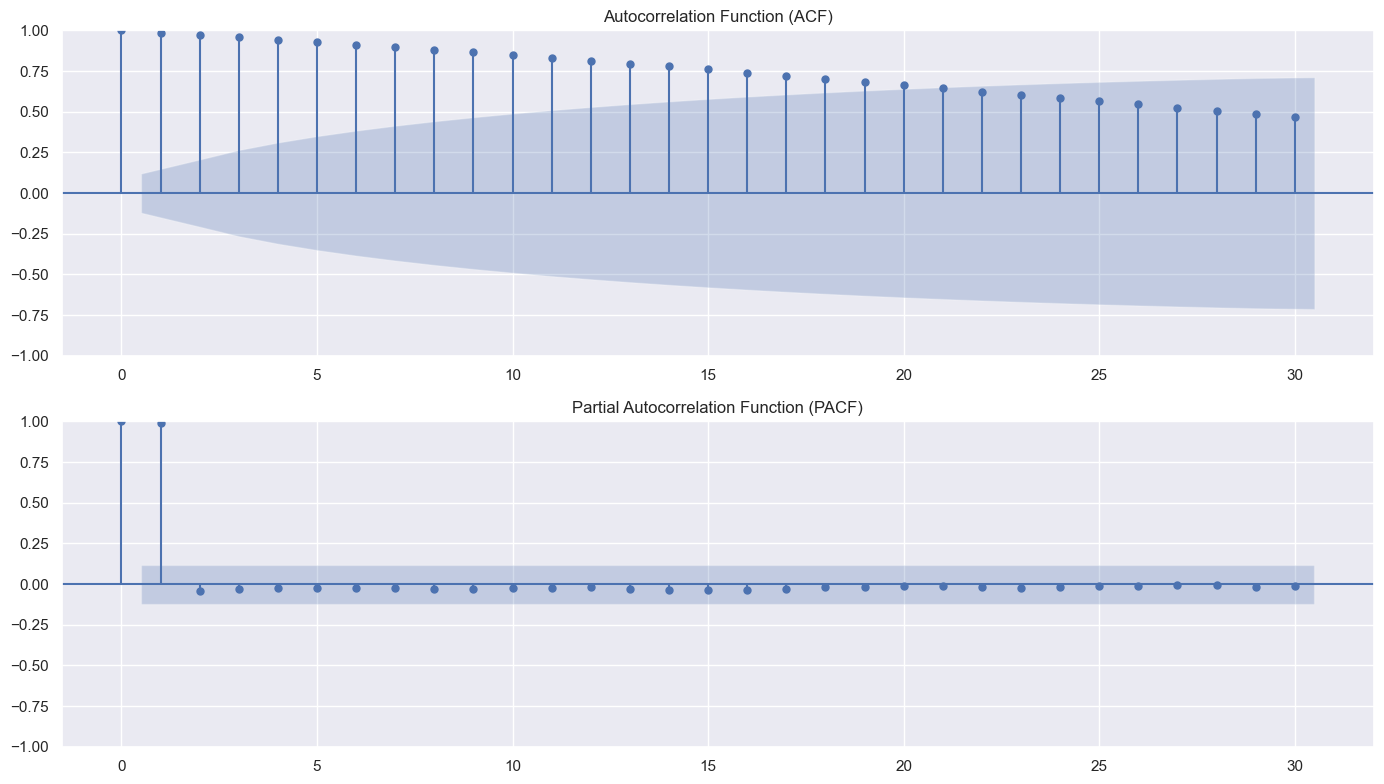

In [311]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example for zip code 60657
timeseries = data.loc[data['RegionName'] == 60657, 'Price']

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

plot_acf(timeseries, ax=ax1, lags=30)
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(timeseries, ax=ax2, lags=30)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

### Dickey-Fuller test to provide insights into the stationarity of the time series data for each ZIP code

In [250]:
print(sorted_annualized_roi_df.loc[:4, ['RegionName', 'City', 'CountyName', 'Annualized_ROI']])

       RegionName           City CountyName  Annualized_ROI
117         11211       New York      Kings           11.85
1155        11222       New York      Kings           11.57
475         11216       New York      Kings           11.31
191          7302    Jersey City     Hudson           11.06
106         11215       New York      Kings           10.83
...           ...            ...        ...             ...
9867        48421  Columbiaville     Lapeer            2.05
12016       13116          Minoa   Onondaga            2.05
12692       39663   Silver Creek   Lawrence            2.05
12343       13480    Sangerfield     Oneida            2.05
4           79936        El Paso    El Paso            2.05

[11660 rows x 4 columns]


**zip1_11211, zip2_11222, zip3_11216, zip4_7302 and zip5_11215**

In [251]:
# create a function that selects zipcode by rank from dataframe sorted_annualised_roi_df and returns a DataFrame of the zip code
def get_dataframe_by_rank(df, rank):
    selected_zipcode = df.iloc[rank-1]  # subtract 1 because of 0-based indexing
    return pd.DataFrame([selected_zipcode])

df_zip1 = get_dataframe_by_rank(sorted_annualized_roi_df, 1)
df_zip2 = get_dataframe_by_rank(sorted_annualized_roi_df, 2)
df_zip3 = get_dataframe_by_rank(sorted_annualized_roi_df, 3)
df_zip4 = get_dataframe_by_rank(sorted_annualized_roi_df, 4)
df_zip5 = get_dataframe_by_rank(sorted_annualized_roi_df, 5)

#### Melt Rest of the zipcode data

In [253]:
# create a function that selects specific columns from the ZipCode and melts the data (converting from wide fomart to long)

def transform_df(df):
    subset_columns = df.columns[7:272]
    df_subset = df[subset_columns]
    return pd.melt(df_subset, var_name='Date', value_name='Value')

df_zip1Transformed = transform_df(df_zip1)
df_zip2Transformed = transform_df(df_zip2)
df_zip3Transformed = transform_df(df_zip3)
df_zip4Transformed = transform_df(df_zip4)
df_zip5Transformed = transform_df(df_zip5)

In [254]:
# create a function that converts the "date" column into datetime and sets it as the index

def set_date_as_index(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)
    return df

# Applying the function to each DataFrame
df_zip1Transformed = set_date_as_index(df_zip1Transformed)
df_zip2Transformed = set_date_as_index(df_zip2Transformed)
df_zip3Transformed = set_date_as_index(df_zip3Transformed)
df_zip4Transformed = set_date_as_index(df_zip4Transformed)
df_zip5Transformed = set_date_as_index(df_zip5Transformed)

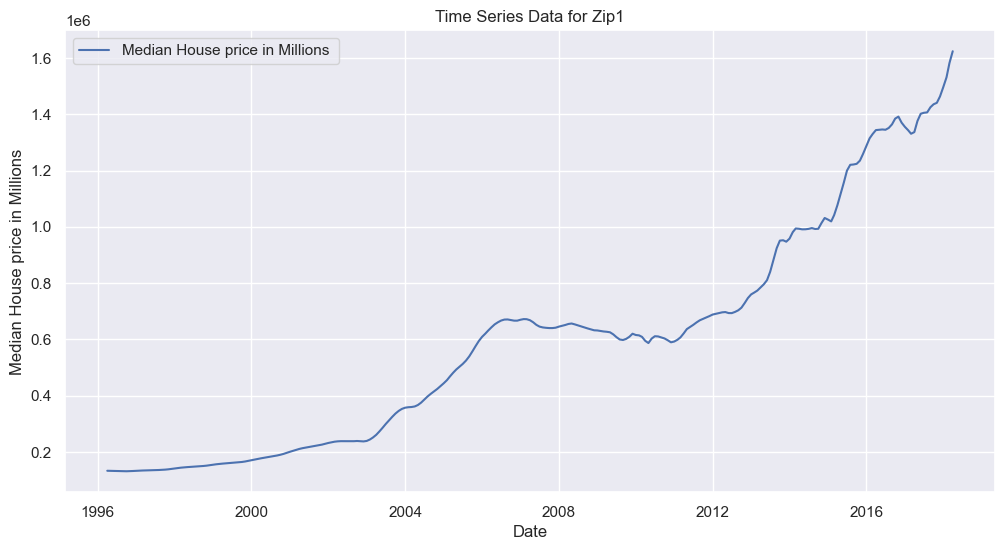

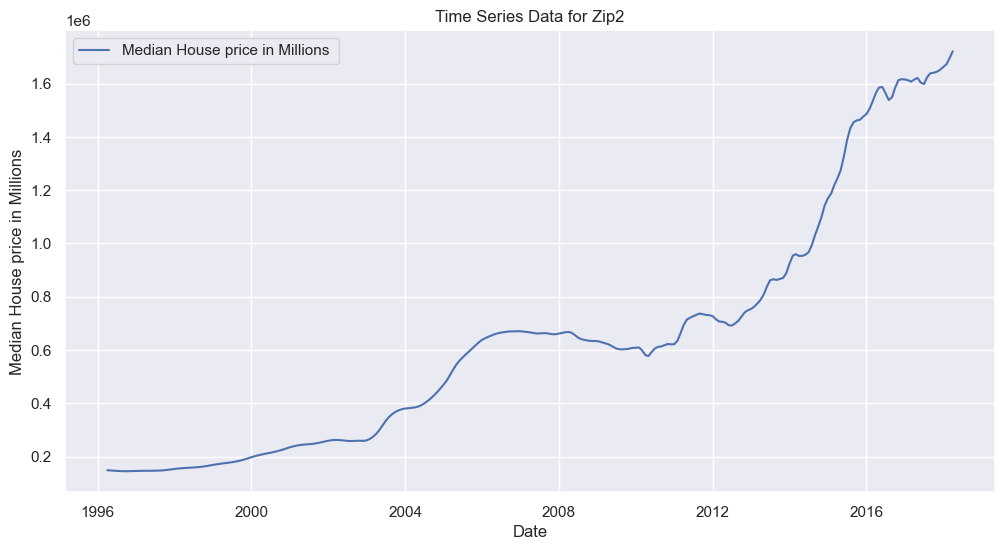

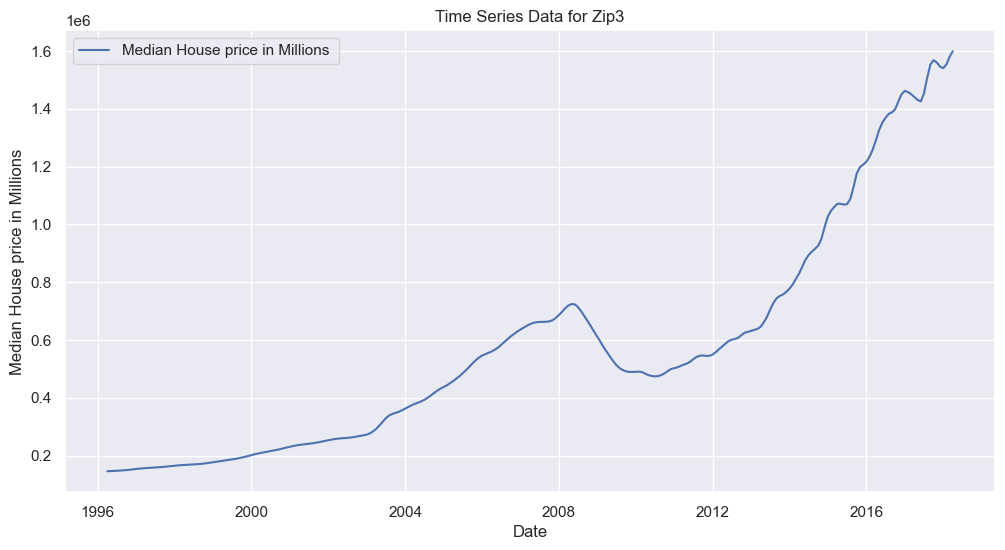

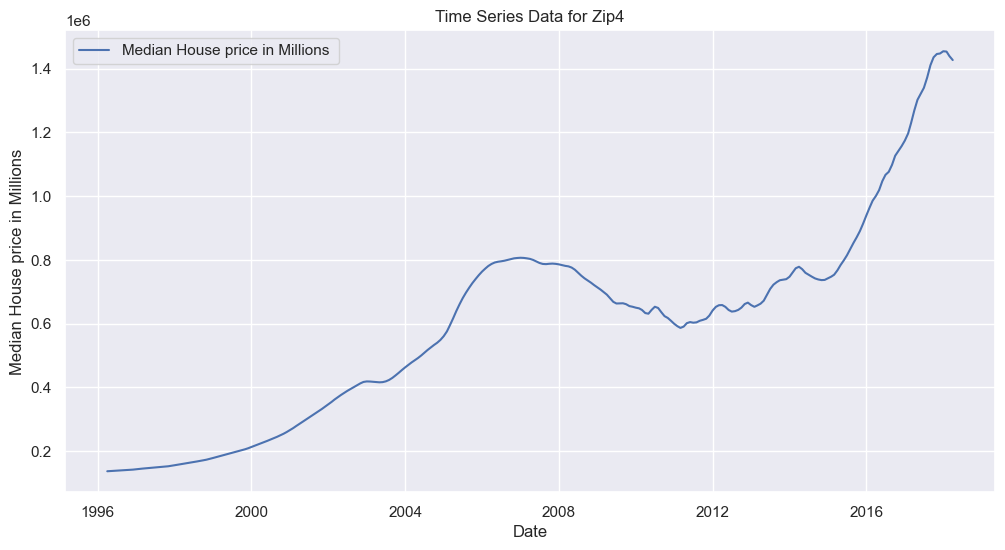

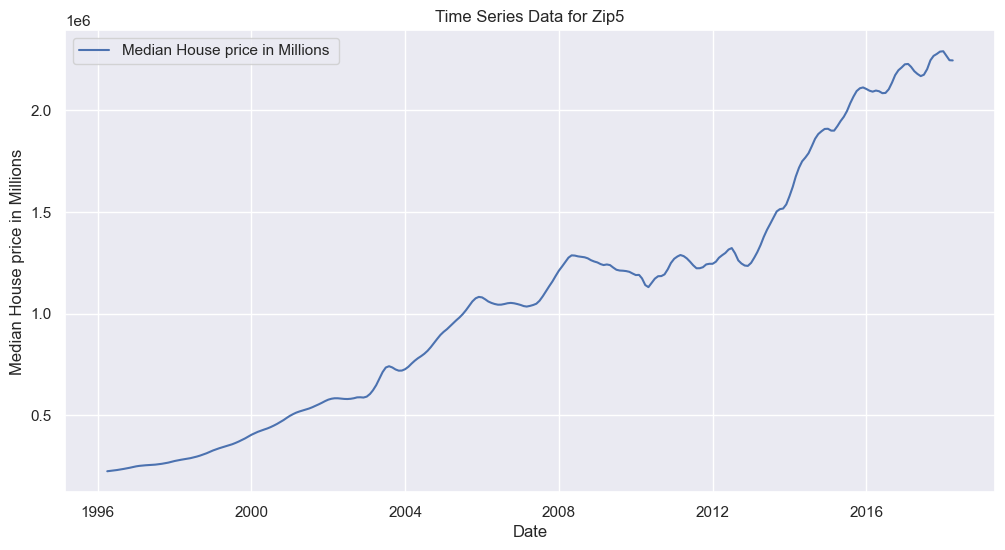

In [255]:
#visualie zipcode data from the 1st ranked to the 5th ranked zip code
dataframes = {
    'Zip1': df_zip1Transformed,
    'Zip2': df_zip2Transformed,
    'Zip3': df_zip3Transformed,
    'Zip4': df_zip4Transformed,
    'Zip5': df_zip5Transformed
}

for zip_name, dataframe in dataframes.items():
    df_temp = dataframe.copy()

    plt.figure(figsize=(12, 6))
    plt.plot(df_temp.index, df_temp['Value'], label='Median House price in Millions ')
    plt.title(f'Time Series Data for {zip_name}')
    plt.xlabel('Date')
    plt.ylabel('Median House price in Millions')
    plt.legend()
    plt.grid(True)
    plt.show()

**Next step functions**

Convert the datetime index into integer timestamps and Fill missing values with the mean of the 'Value' column.

Run the Dickey-Fuller test on the original data and Apply a log transformation followed by differencing.

Visualize the detrended data.


Dickey-Fuller Test - Original Data (Zip1):
ADF Statistic: 1.988402696801749
p-value: 0.9986576909330424

Dickey-Fuller Test - Log and Differenced Data (Zip1):
ADF Statistic: -2.8492056831634986
p-value: 0.05158155781442329


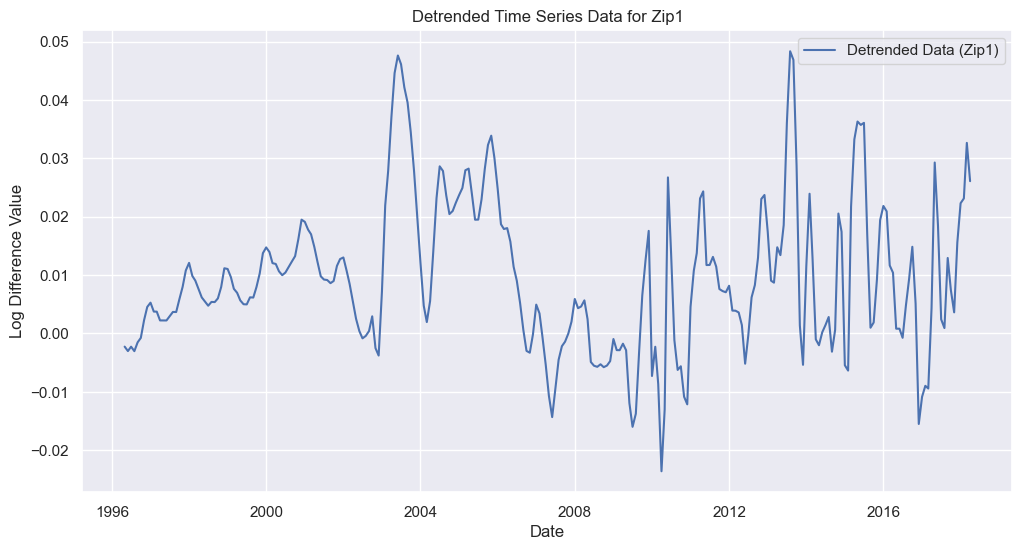


Dickey-Fuller Test - Original Data (Zip2):
ADF Statistic: 1.0244051120506332
p-value: 0.9945168916750927

Dickey-Fuller Test - Log and Differenced Data (Zip2):
ADF Statistic: -2.742197357673985
p-value: 0.06701656258929696


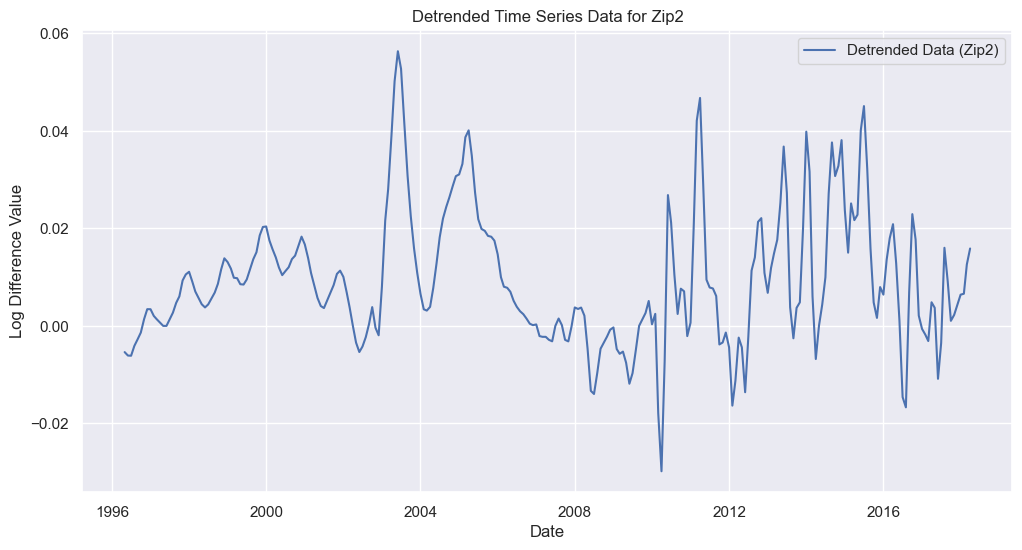


Dickey-Fuller Test - Original Data (Zip3):
ADF Statistic: 0.2031557019103027
p-value: 0.9724380332622599

Dickey-Fuller Test - Log and Differenced Data (Zip3):
ADF Statistic: -2.2585836425996453
p-value: 0.18567354068436503


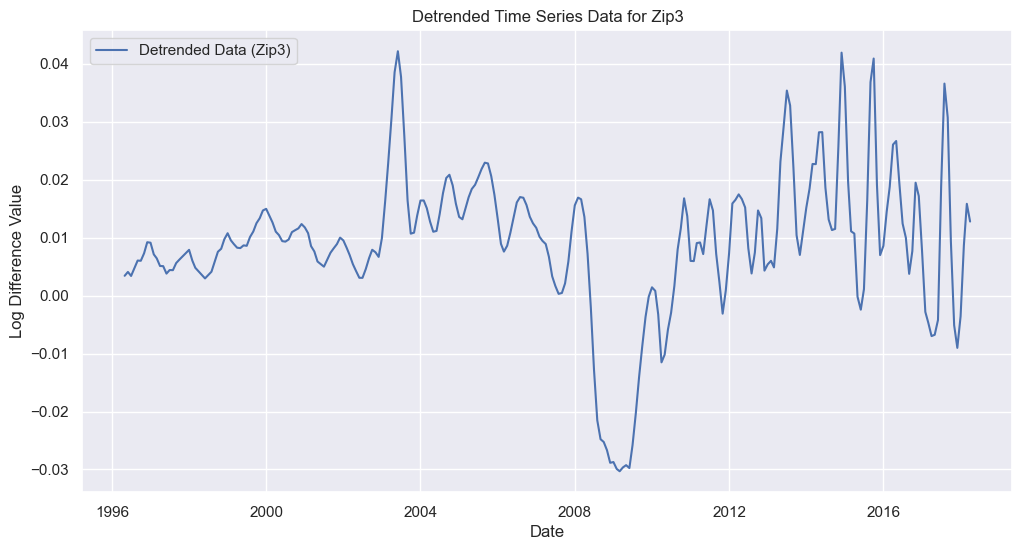


Dickey-Fuller Test - Original Data (Zip4):
ADF Statistic: -0.5499497232374765
p-value: 0.8818951286500782

Dickey-Fuller Test - Log and Differenced Data (Zip4):
ADF Statistic: -1.820323967274833
p-value: 0.3704191080287311


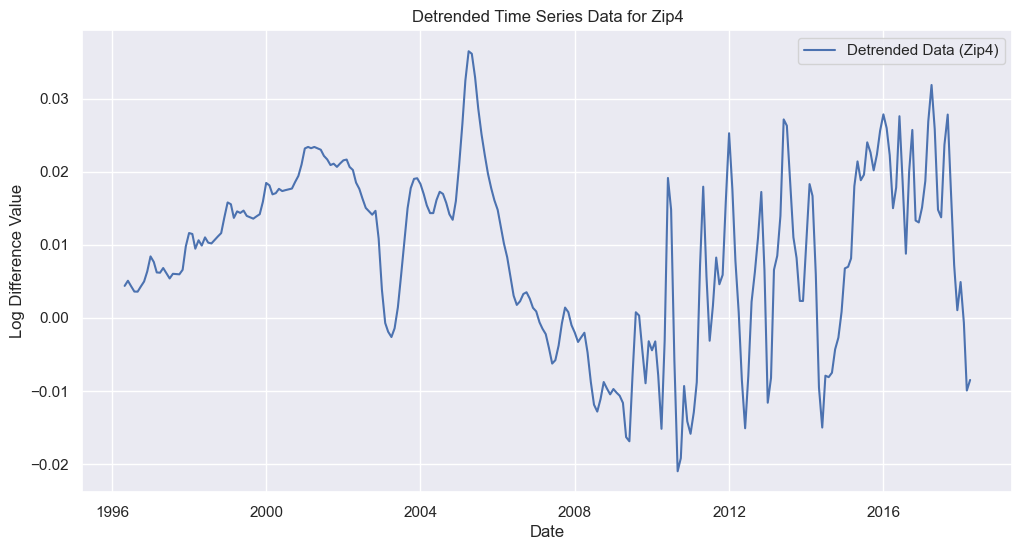


Dickey-Fuller Test - Original Data (Zip5):
ADF Statistic: 0.4646259676014443
p-value: 0.9837573347851621

Dickey-Fuller Test - Log and Differenced Data (Zip5):
ADF Statistic: -2.7473161077081762
p-value: 0.06620224607527317


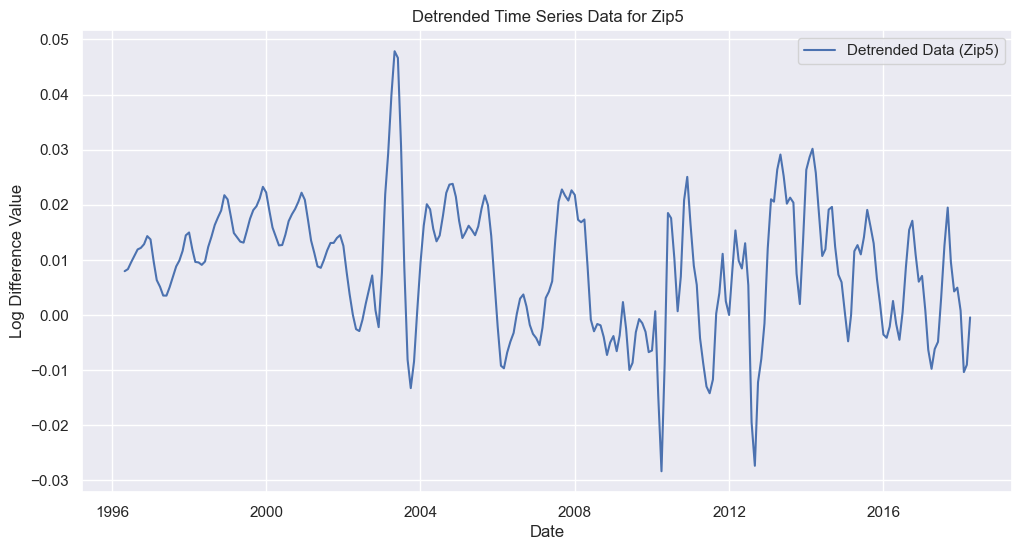

In [256]:
def preprocess_and_detrend(df, zip_name):
    # Convert datetime index into integer timestamps and scale
    x_values = df.index.astype(int) / 1e18

    # Replace missing values with the mean
    mean_value = df['Value'].mean()
    df['Value'].fillna(mean_value, inplace=True)

    # Dickey-Fuller test on original data
    result_original = adfuller(df['Value'])
    print(f"\nDickey-Fuller Test - Original Data ({zip_name}):")
    print("ADF Statistic:", result_original[0])
    print("p-value:", result_original[1])

    # Log Transformation and Differencing
    df['Log'] = np.log(df['Value'])
    df['Log_Diff'] = df['Log'].diff()

    # Dickey-Fuller test on log-transformed and differenced data
    result_log_diff = adfuller(df['Log_Diff'].dropna())
    print(f"\nDickey-Fuller Test - Log and Differenced Data ({zip_name}):")
    print("ADF Statistic:", result_log_diff[0])
    print("p-value:", result_log_diff[1])

    # Visualize the detrended data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Log_Diff'], label=f'Detrended Data ({zip_name})')
    plt.title(f'Detrended Time Series Data for {zip_name}')
    plt.xlabel('Date')
    plt.ylabel('Log Difference Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Applying the function to each DataFrame
dataframes = {
    'Zip1': df_zip1Transformed,
    'Zip2': df_zip2Transformed,
    'Zip3': df_zip3Transformed,
    'Zip4': df_zip4Transformed,
    'Zip5': df_zip5Transformed
}

for zip_name, dataframe in dataframes.items():
    preprocess_and_detrend(dataframe, zip_name)

Stationarity is important in time series analysis because many forecasting models assume that the underlying data does not change over time in a systematic way. The tests typically assess the stationarity of time series data. 

Here's a summary of your results:

ZIP Code 1:
Original Data:
ADF Statistic: 1.9884
p-value: 0.9987 (Non-stationary)
Log and Differenced Data:
ADF Statistic: -2.8492
p-value: 0.0516 (Stationary at 5% significance level)

ZIP Code 2:
Original Data:
ADF Statistic: 1.0244
p-value: 0.9945 (Non-stationary)
Log and Differenced Data:
ADF Statistic: -2.7422
p-value: 0.0670 (Stationary at 10% significance level)

ZIP Code 3:
Original Data:
ADF Statistic: 0.2032
p-value: 0.9724 (Non-stationary)
Log and Differenced Data:
ADF Statistic: -2.2586
p-value: 0.1857 (Non-stationary)

ZIP Code 4:
Original Data:
ADF Statistic: -0.5499
p-value: 0.8819 (Non-stationary)
Log and Differenced Data:
ADF Statistic: -1.8203
p-value: 0.3704 (Non-stationary)

ZIP Code 5:
Original Data:
ADF Statistic: 0.4646
p-value: 0.9838 (Non-stationary)
Log and Differenced Data:
ADF Statistic: -2.7473
p-value: 0.0662 (Stationary at 10% significance level)

For the Dickey-Fuller test, the null hypothesis is that the time series data is non-stationary. A lower p-value (typically less than 0.05) indicates that you can reject the null hypothesis and infer stationarity. In cases where the p-value is higher, the data is likely non-stationary.

Based on these results:

ZIP Code 1 and ZIP Code 5 show evidence of stationarity after logarithmic transformation and differencing.
ZIP Code 2 shows potential stationarity at a higher significance level (10%).
ZIP Code 3, ZIP Code 4, and the original forms of ZIP Code 2 do not show evidence of stationarity based on the tests conducted.


Recommendations:

For ZIP codes where transformation and differencing did not achieve stationarity (ZIP Code 3, ZIP Code 4), consider exploring other transformations or more advanced models that can handle non-stationary data.
Continue to monitor the data and consider additional diagnostic tests to ensure the robustness of your findings.

### MODELING AND EVALUATION 

### 1. ARIMA MODEL


ARIMA Model Summary for Zip1:
                               SARIMAX Results                                
Dep. Variable:                    Log   No. Observations:                  212
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 800.899
Date:                Sat, 29 Jun 2024   AIC                          -1595.797
Time:                        16:31:33   BIC                          -1585.742
Sample:                    04-01-1996   HQIC                         -1591.733
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8632      0.035     24.999      0.000       0.796       0.931
ma.L1          0.4955      0.033     15.092      0.000       0.431       0.560
sigma2      2.922e-05

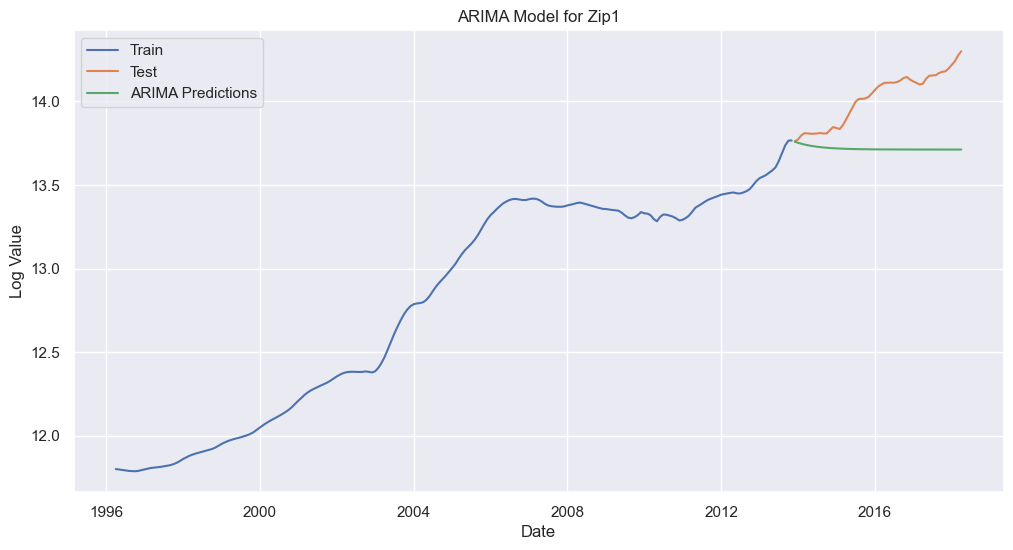


ARIMA Model Summary for Zip2:
                               SARIMAX Results                                
Dep. Variable:                    Log   No. Observations:                  212
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 817.704
Date:                Sat, 29 Jun 2024   AIC                          -1629.407
Time:                        16:31:34   BIC                          -1619.352
Sample:                    04-01-1996   HQIC                         -1625.343
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8336      0.029     28.412      0.000       0.776       0.891
ma.L1          0.7467      0.024     31.040      0.000       0.700       0.794
sigma2      2.481e-05

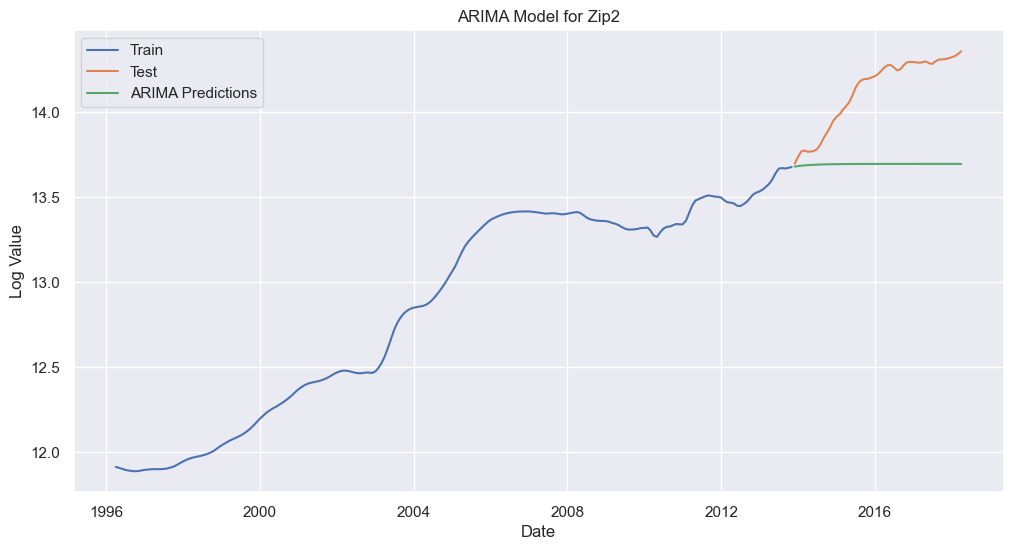


ARIMA Model Summary for Zip3:
                               SARIMAX Results                                
Dep. Variable:                    Log   No. Observations:                  212
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 859.967
Date:                Sat, 29 Jun 2024   AIC                          -1713.934
Time:                        16:31:35   BIC                          -1703.879
Sample:                    04-01-1996   HQIC                         -1709.870
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9382      0.035     26.524      0.000       0.869       1.008
ma.L1          0.9783      0.003    306.228      0.000       0.972       0.985
sigma2      1.632e-05

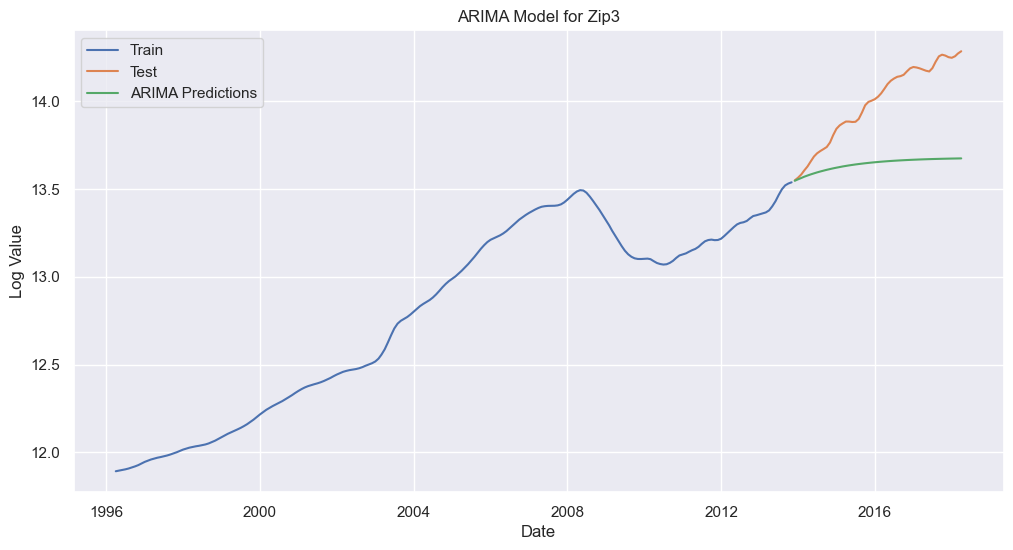


ARIMA Model Summary for Zip4:
                               SARIMAX Results                                
Dep. Variable:                    Log   No. Observations:                  212
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 880.627
Date:                Sat, 29 Jun 2024   AIC                          -1755.254
Time:                        16:31:35   BIC                          -1745.198
Sample:                    04-01-1996   HQIC                         -1751.189
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8789      0.033     26.375      0.000       0.814       0.944
ma.L1          0.6885      0.037     18.594      0.000       0.616       0.761
sigma2      1.368e-05

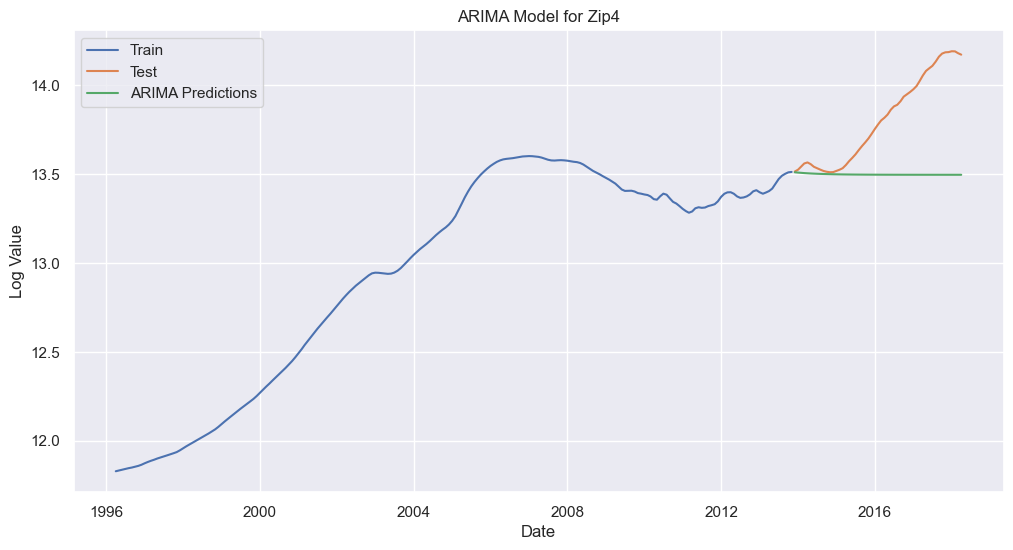


ARIMA Model Summary for Zip5:
                               SARIMAX Results                                
Dep. Variable:                    Log   No. Observations:                  212
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 834.205
Date:                Sat, 29 Jun 2024   AIC                          -1662.411
Time:                        16:31:36   BIC                          -1652.355
Sample:                    04-01-1996   HQIC                         -1658.346
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8308      0.035     23.705      0.000       0.762       0.900
ma.L1          0.7796      0.024     31.953      0.000       0.732       0.827
sigma2      2.121e-05

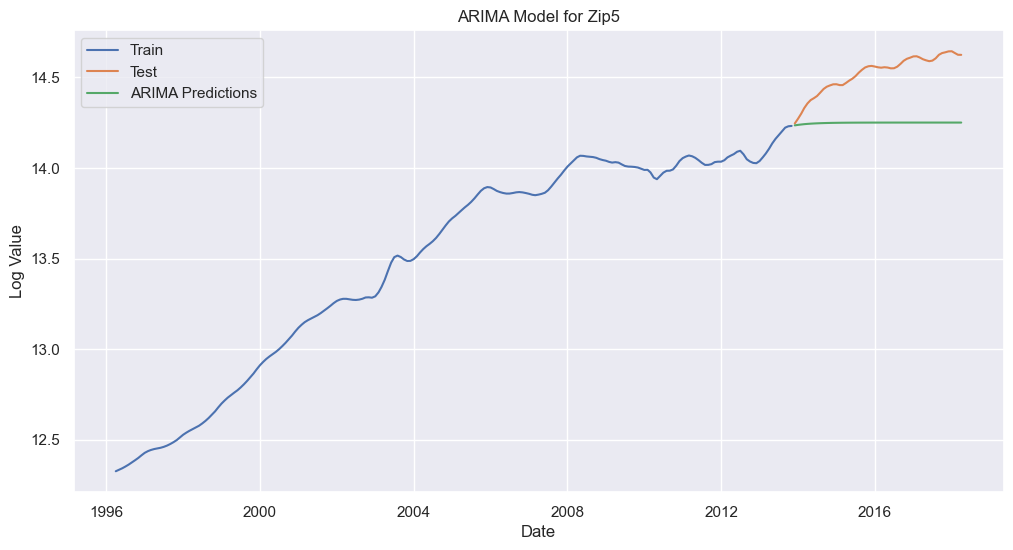

In [266]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def apply_arima(df, zip_name):
    # Assuming that the DataFrame df already has the column 'Log'
    # and you want to model it

    # Drop missing values from 'Log'
    df.dropna(subset=['Log'], inplace=True)

    # Split the data into training and test sets
    train_size = int(len(df['Log']) * 0.8)
    train, test = df['Log'][:train_size], df['Log'][train_size:]

    # Fit the ARIMA model
    model = ARIMA(train, order=(1, 1, 1))
    model_fitted = model.fit()

    # Summary of the model
    print(f"\nARIMA Model Summary for {zip_name}:")
    print(model_fitted.summary())

    # Make predictions
    start = len(train)
    end = start + len(test) - 1
    predictions = model_fitted.predict(start=start, end=end, dynamic=False)

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(test, predictions)
    print(f'Mean Absolute Error on test set for {zip_name}:', mae)

    # Calculate Mean Squared Error
    mse = mean_squared_error(test, predictions)
    print(f'Mean Squared Error on test set for {zip_name}:', mse)

    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error on test set for {zip_name}:', rmse)

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[:train_size], train, label='Train')
    plt.plot(df.index[train_size:], test, label='Test')
    plt.plot(df.index[train_size:], predictions, label='ARIMA Predictions')
    plt.title(f"ARIMA Model for {zip_name}")
    plt.xlabel('Date')
    plt.ylabel('Log Value')
    plt.legend()
    plt.show()

# Assuming dataframes is a dictionary where the keys are the zip names
# and the values are the corresponding DataFrames
dataframes = {
    'Zip1': df_zip1Transformed,
    'Zip2': df_zip2Transformed,
    'Zip3': df_zip3Transformed,
    'Zip4': df_zip4Transformed,
    'Zip5': df_zip5Transformed
}

for zip_name, dataframe in dataframes.items():
    apply_arima(dataframe, zip_name)


### Interpretation of the Arima Model Findings

These ARIMA model summaries provide a detailed overview of the fitted models for each ZIP code based on log-transformed and differenced data. Here are the key points from each summary:

ZIP Code 1:

Model: ARIMA(1, 1, 1)
Log Likelihood: 800.899
AIC: -1595.797
BIC: -1585.742
Significant Coefficients:
AR(1): 0.8632 (p < 0.001)
MA(1): 0.4955 (p < 0.001)
Goodness of Fit:
Ljung-Box (Q): 0.02 (p = 0.88)
Jarque-Bera (JB): 977.03 (p < 0.001)
Accuracy Metrics:
MAE: 0.3015
MSE: 0.1177
RMSE: 0.3430

ZIP Code 2:

Model: ARIMA(1, 1, 1)
Log Likelihood: 817.704
AIC: -1629.407
BIC: -1619.352
Significant Coefficients:
AR(1): 0.8336 (p < 0.001)
MA(1): 0.7467 (p < 0.001)
Goodness of Fit:
Ljung-Box (Q): 0.25 (p = 0.62)
Jarque-Bera (JB): 328.11 (p < 0.001)
Accuracy Metrics:
MAE: 0.4342
MSE: 0.2301
RMSE: 0.4797

ZIP Code 3:

Model: ARIMA(1, 1, 1)
Log Likelihood: 859.967
AIC: -1713.934
BIC: -1703.879
Significant Coefficients:
AR(1): 0.9382 (p < 0.001)
MA(1): 0.9783 (p < 0.001)
Goodness of Fit:
Ljung-Box (Q): 78.88 (p < 0.001)
Jarque-Bera (JB): 15.61 (p < 0.001)
Accuracy Metrics:
MAE: 0.3513
MSE: 0.1589
RMSE: 0.3986

ZIP Code 4:

Model: ARIMA(1, 1, 1)
Log Likelihood: 880.627
AIC: -1755.254
BIC: -1745.198
Significant Coefficients:
AR(1): 0.8789 (p < 0.001)
MA(1): 0.6885 (p < 0.001)
Goodness of Fit:
Ljung-Box (Q): 4.04 (p = 0.04)
Jarque-Bera (JB): 96.00 (p < 0.001)
Accuracy Metrics:
MAE: 0.3033
MSE: 0.1544
RMSE: 0.3929

ZIP Code 5:

Model: ARIMA(1, 1, 1)
Log Likelihood: 834.205
AIC: -1662.411
BIC: -1652.355
Significant Coefficients:
AR(1): 0.8308 (p < 0.001)
MA(1): 0.7796 (p < 0.001)
Goodness of Fit:
Ljung-Box (Q): 0.03 (p = 0.87)
Jarque-Bera (JB): 203.22 (p < 0.001)
Accuracy Metrics:
MAE: 0.2728
MSE: 0.0841
RMSE: 0.2901

**Interpretation:**

**Model Coefficients: AR(1) and MA(1) coefficients are statistically significant (p < 0.05) across all ZIP codes, indicating they contribute significantly to the model.**

**Goodness of Fit: Generally, the models have high log likelihood values and low AIC/BIC values, suggesting good model fit.
Accuracy Metrics:**

**The MAE, MSE, and RMSE provide measures of prediction accuracy, with lower values indicating better performance.**

These summaries suggest that the ARIMA(1, 1, 1) models fitted to the log-transformed and differenced data provide reasonable fits for predicting housing prices in each ZIP code. Further analysis could involve diagnostic checks for residuals and potentially exploring other model variations to optimize forecasting accuracy further.

### 2. SARIMAX MODELING


SARIMAX Model Summary for Zip1:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 737.431
Date:                            Sat, 29 Jun 2024   AIC                          -1464.862
Time:                                    15:56:39   BIC                          -1448.395
Sample:                                04-01-1996   HQIC                         -1458.198
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7723      0.041     18.806      0.000       0.692       0.853
ma

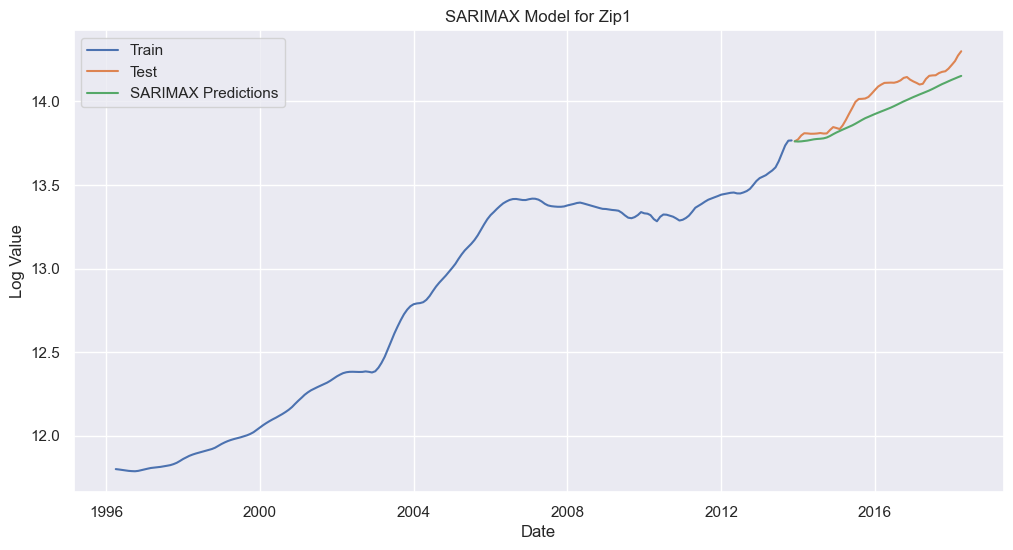


SARIMAX Model Summary for Zip2:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 723.456
Date:                            Sat, 29 Jun 2024   AIC                          -1436.912
Time:                                    15:56:42   BIC                          -1420.446
Sample:                                04-01-1996   HQIC                         -1430.248
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6321      0.039     16.244      0.000       0.556       0.708
ma

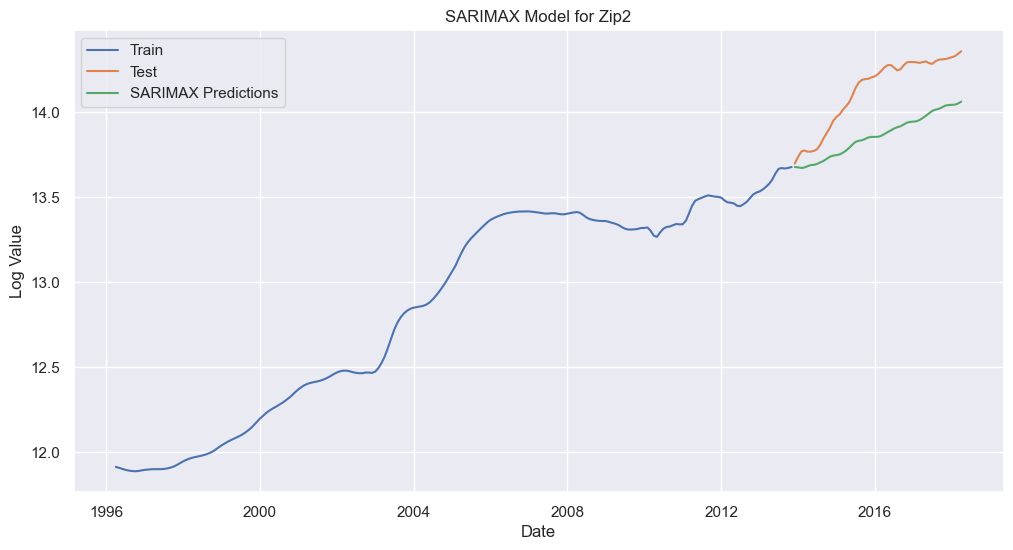


SARIMAX Model Summary for Zip3:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 837.772
Date:                            Sat, 29 Jun 2024   AIC                          -1665.544
Time:                                    15:56:44   BIC                          -1649.078
Sample:                                04-01-1996   HQIC                         -1658.880
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8595      0.025     34.226      0.000       0.810       0.909
ma

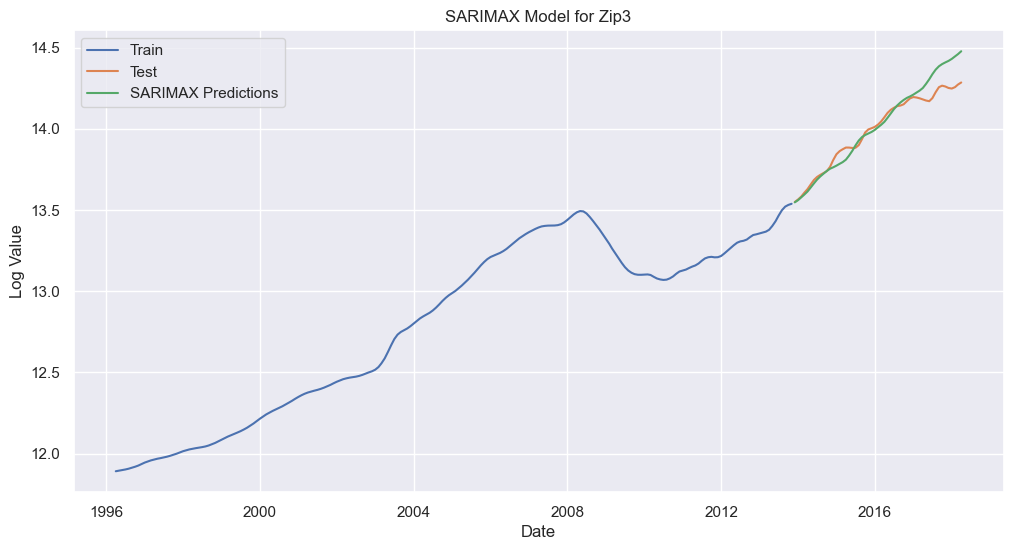


SARIMAX Model Summary for Zip4:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 776.712
Date:                            Sat, 29 Jun 2024   AIC                          -1543.425
Time:                                    15:56:49   BIC                          -1526.958
Sample:                                04-01-1996   HQIC                         -1536.760
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8055      0.040     19.956      0.000       0.726       0.885
ma

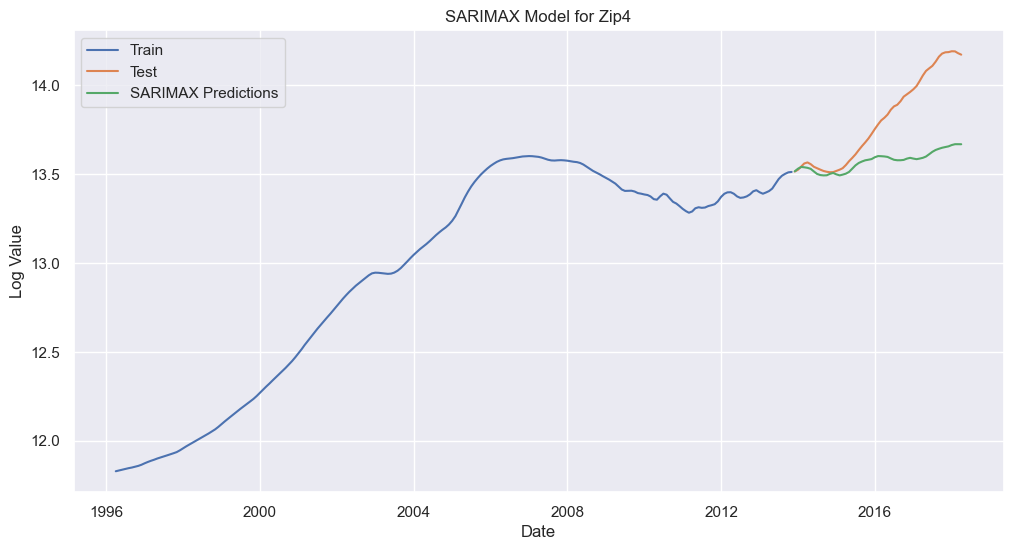


SARIMAX Model Summary for Zip5:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 736.983
Date:                            Sat, 29 Jun 2024   AIC                          -1463.967
Time:                                    15:56:50   BIC                          -1447.500
Sample:                                04-01-1996   HQIC                         -1457.302
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6786      0.046     14.654      0.000       0.588       0.769
ma

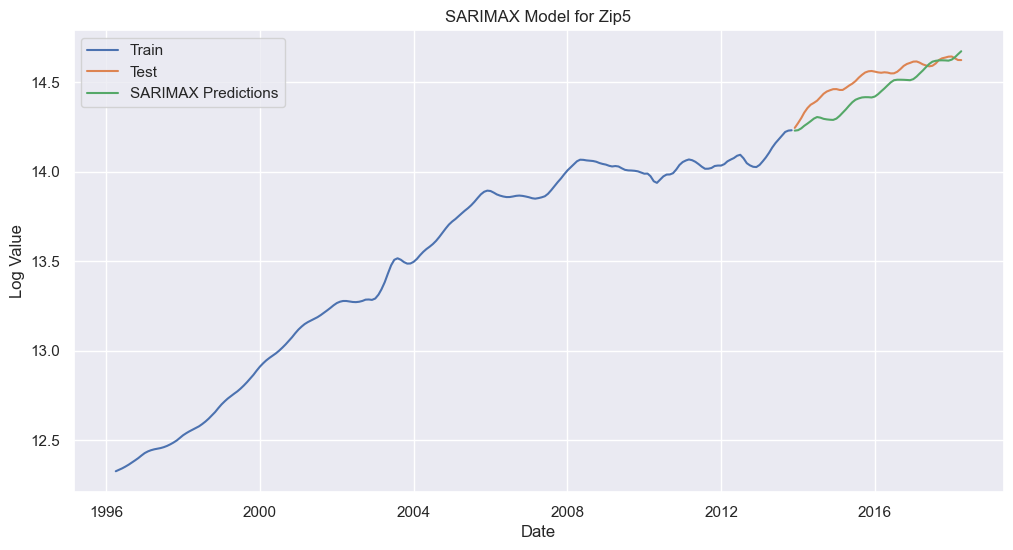

In [265]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def apply_sarimax(df, zip_name):
    # Assuming that the DataFrame df already has the column 'Log'
    # and you want to model it

    # Drop missing values from 'Log'
    df.dropna(subset=['Log'], inplace=True)

    # Split the data into training and test sets
    train_size = int(len(df['Log']) * 0.8)
    train, test = df['Log'][:train_size], df['Log'][train_size:]

    # Fit the SARIMAX model
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fitted = model.fit()

    # Summary of the model
    print(f"\nSARIMAX Model Summary for {zip_name}:")
    print(model_fitted.summary())

    # Make predictions
    start = len(train)
    end = start + len(test) - 1
    predictions = model_fitted.predict(start=start, end=end, dynamic=False)

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(test, predictions)
    print(f'Mean Absolute Error on test set for {zip_name}:', mae)

    # Calculate Mean Squared Error
    mse = mean_squared_error(test, predictions)
    print(f'Mean Squared Error on test set for {zip_name}:', mse)

    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error on test set for {zip_name}:', rmse)

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[:train_size], train, label='Train')
    plt.plot(df.index[train_size:], test, label='Test')
    plt.plot(df.index[train_size:], predictions, label='SARIMAX Predictions')
    plt.title(f"SARIMAX Model for {zip_name}")
    plt.xlabel('Date')
    plt.ylabel('Log Value')
    plt.legend()
    plt.show()

# Assuming dataframes is a dictionary where the keys are the zip names
# and the values are the corresponding DataFrames
dataframes = {
    'Zip1': df_zip1Transformed,
    'Zip2': df_zip2Transformed,
    'Zip3': df_zip3Transformed,
    'Zip4': df_zip4Transformed,
    'Zip5': df_zip5Transformed
}
for zip_name, dataframe in dataframes.items():
    apply_sarimax(dataframe, zip_name)

**Finding for each ZIP code based on their SARIMAX model summaries:**

**Best Model Fit:** Zip3 stands out with the highest likelihood and lowest AIC, suggesting it has the best model among the five ZIP codes.

**Performance Differences:** Zip3 and Zip5 generally show lower prediction errors (RMSE), indicating more accurate models compared to Zip2, Zip4, and to some extent, Zip1.

Looking at the results for each Zip code, we can see that:

All models have statistically significant coefficients (low p-values).

Zip3 and Zip4 have the highest Log Likelihood values, suggesting they might be the best-fitting models among the five.

Zip1, Zip2, Zip4 and Zip5 have Ljung-Box tests with significant p-values, indicating a potential issue with normality of residuals.

All models show signs of heteroskedasticity based on the prob(H) values.

Zip5 has the lowest MAE and RMSE on the test set, indicating the best forecasting performance.

### Next Step:FORECASTING using the SARIMAX Model

SARIMAX model was used to the entire data set to make future forecasts for the next 6 years. Plots the actual and forecasted values for easy visualization.

SARIMAX model was used as the data exhibits clear seasonal patterns, yearly trends. This model can capture these patterns and potentially improve forecasting accuracy. 

Here's a breakdown of the advantages of using SARIMAX models in forecasting:

1. Handling Seasonality.

2. Incorporating External Factors: The "X" in SARIMAX stands for exogenous variables. These are external factors that might influence the time series data you're trying to forecast. SARIMAX allows you to incorporate these variables into the model, potentially improving forecasting accuracy.

3. Improved Forecasting Accuracy: By capturing seasonality and incorporating relevant external factors, SARIMAX models can often outperform simpler models like ARIMA for time series forecasting. This is particularly true when the data exhibits strong seasonal trends and is potentially influenced by external events.


SARIMAX Model Summary for Zip1:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 901.521
Date:                            Sat, 29 Jun 2024   AIC                          -1793.042
Time:                                    17:34:10   BIC                          -1775.395
Sample:                                04-01-1996   HQIC                         -1785.941
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7568      0.046     16.497      0.000       0.667       0.847
ma

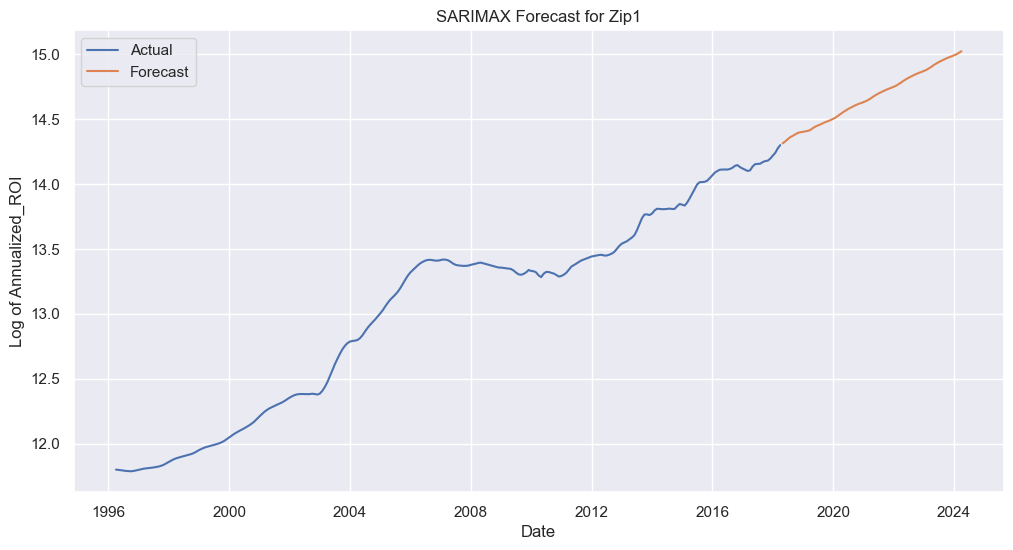


SARIMAX Model Summary for Zip2:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 858.404
Date:                            Sat, 29 Jun 2024   AIC                          -1706.807
Time:                                    17:34:11   BIC                          -1689.160
Sample:                                04-01-1996   HQIC                         -1699.707
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6116      0.056     10.973      0.000       0.502       0.721
ma

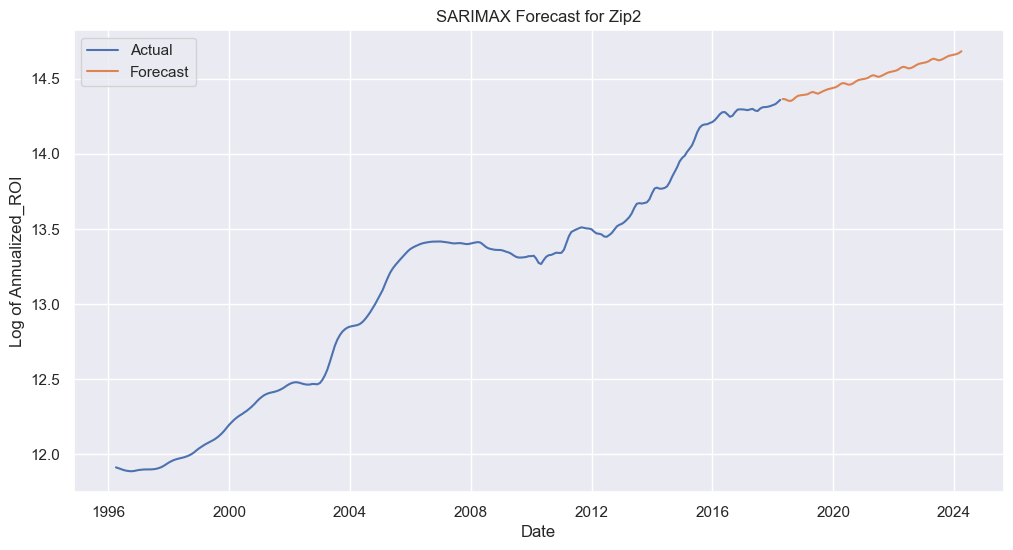


SARIMAX Model Summary for Zip3:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 972.675
Date:                            Sat, 29 Jun 2024   AIC                          -1935.351
Time:                                    17:34:14   BIC                          -1917.704
Sample:                                04-01-1996   HQIC                         -1928.250
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7787      0.029     26.623      0.000       0.721       0.836
ma

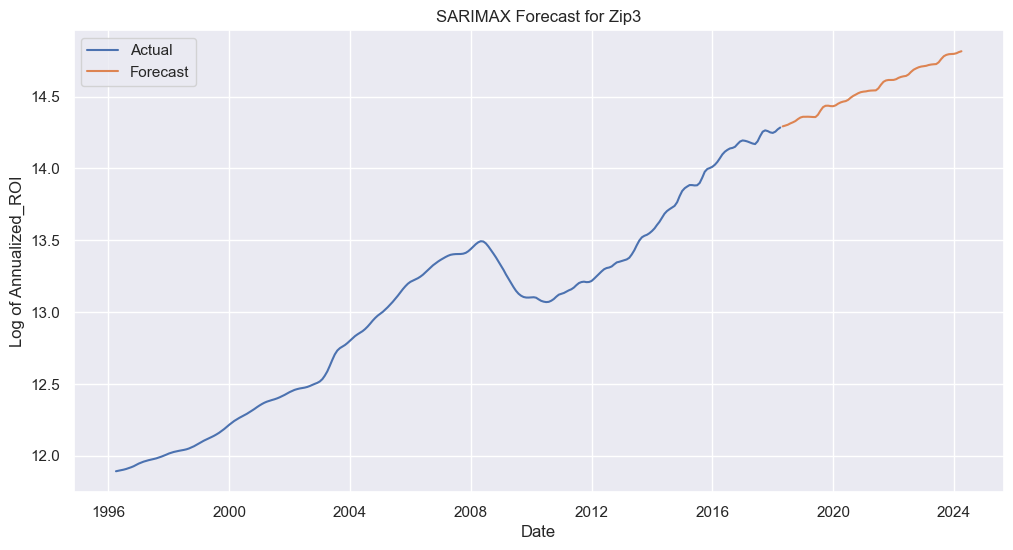


SARIMAX Model Summary for Zip4:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 972.385
Date:                            Sat, 29 Jun 2024   AIC                          -1934.769
Time:                                    17:34:18   BIC                          -1917.122
Sample:                                04-01-1996   HQIC                         -1927.668
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6716      0.039     17.185      0.000       0.595       0.748
ma

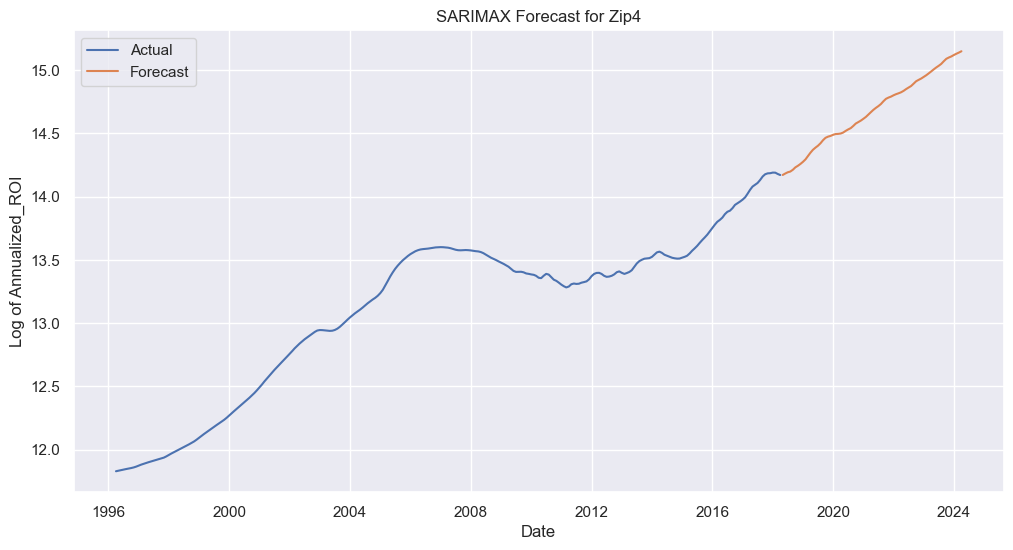


SARIMAX Model Summary for Zip5:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 927.928
Date:                            Sat, 29 Jun 2024   AIC                          -1845.856
Time:                                    17:34:19   BIC                          -1828.209
Sample:                                04-01-1996   HQIC                         -1838.755
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6691      0.044     15.230      0.000       0.583       0.755
ma

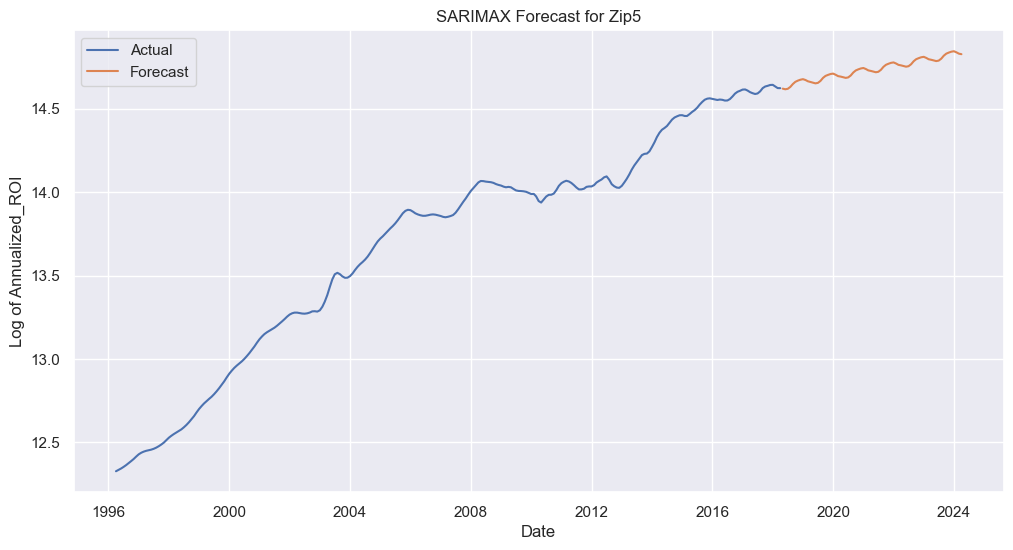

In [269]:
from pandas.tseries.offsets import DateOffset

def apply_sarimax_and_forecast(df, zip_name):

    # and you want to model it

    # Drop missing values from 'Log'
    df.dropna(subset=['Log'], inplace=True)

    # Fit the SARIMAX model to the entire dataset
    model = SARIMAX(df['Log'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fitted = model.fit()

    # Summary of the model
    print(f"\nSARIMAX Model Summary for {zip_name}:")
    print(model_fitted.summary())

    # Make future forecasts for next 6 years (6 years * 12 months = 72 months)
    future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 73)]
    future_dates_df = pd.DataFrame(index=future_dates, columns=df.columns)
    future_df = pd.concat([df, future_dates_df])

    start = len(df)
    end = start + 72 - 1  # 72 months for 6 years
    future_df['Forecast'] = model_fitted.predict(start=start, end=end, dynamic=False)
        # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Log'], label='Actual')
    plt.plot(future_df.index[start:], future_df['Forecast'][start:], label='Forecast')
    plt.title(f"SARIMAX Forecast for {zip_name}")
    plt.xlabel('Date')
    plt.ylabel('Log of Annualized_ROI')
    plt.legend()
    plt.show()

    return future_df['Forecast'][start:]

# Assuming dataframes is a dictionary where the keys are the zip names
# and the values are the corresponding DataFrames
dataframes = {
    'Zip1': df_zip1Transformed,
    'Zip2': df_zip2Transformed,
    'Zip3': df_zip3Transformed,
    'Zip4': df_zip4Transformed,
    'Zip5': df_zip5Transformed
}

forecasted_values = {}

for zip_name, dataframe in dataframes.items():
    forecasted_values[zip_name] = apply_sarimax_and_forecast(dataframe, zip_name)

#### Forecasted ROI for each of the top 5 zipcodes for the next 6 Years

In [275]:
def print_forecasted_values(forecasted_values):
    for zip_name, forecast in forecasted_values.items():
        print(f"\nForecasted values for {zip_name} for the next 6 years:")
        print(forecast)
print_forecasted_values(forecasted_values)


Forecasted values for Zip1 for the next 6 years:
2018-05-01   14.31
2018-06-01   14.33
2018-07-01   14.35
2018-08-01   14.36
2018-09-01   14.37
              ... 
2023-12-01   14.98
2024-01-01   14.99
2024-02-01   15.00
2024-03-01   15.01
2024-04-01   15.02
Name: Forecast, Length: 72, dtype: float64

Forecasted values for Zip2 for the next 6 years:
2018-05-01   14.36
2018-06-01   14.36
2018-07-01   14.35
2018-08-01   14.35
2018-09-01   14.36
              ... 
2023-12-01   14.66
2024-01-01   14.66
2024-02-01   14.66
2024-03-01   14.67
2024-04-01   14.68
Name: Forecast, Length: 72, dtype: float64

Forecasted values for Zip3 for the next 6 years:
2018-05-01   14.29
2018-06-01   14.30
2018-07-01   14.30
2018-08-01   14.31
2018-09-01   14.32
              ... 
2023-12-01   14.80
2024-01-01   14.80
2024-02-01   14.80
2024-03-01   14.81
2024-04-01   14.82
Name: Forecast, Length: 72, dtype: float64

Forecasted values for Zip4 for the next 6 years:
2018-05-01   14.17
2018-06-01   14.18
2018-0

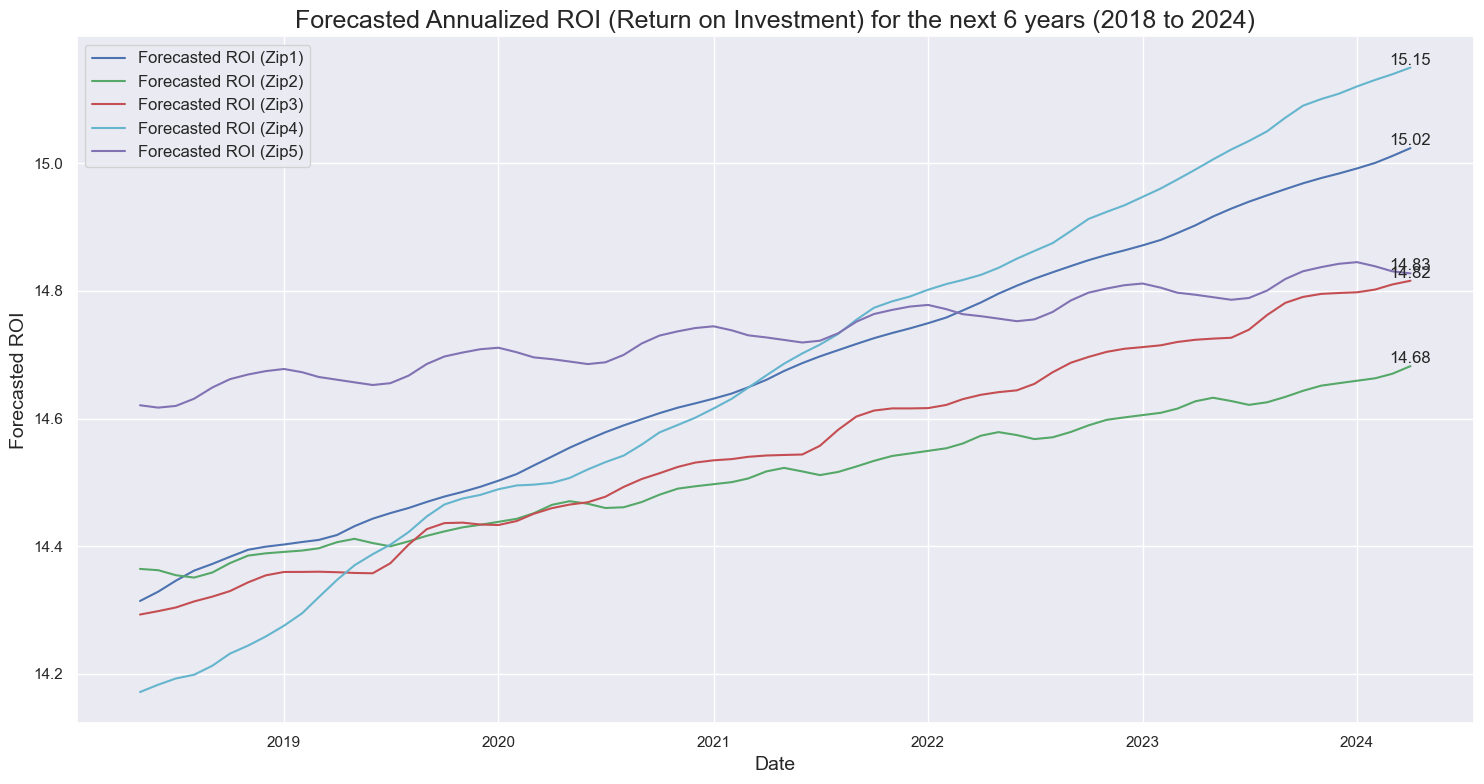

In [298]:
import matplotlib.pyplot as plt

def plot_forecasted_values(forecasted_values):
    plt.figure(figsize=(15, 8))

    # Define custom colors for each forecasted series
    custom_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Plot each forecasted ROI with a different color
    for i, (zip_name, forecast) in enumerate(forecasted_values.items()):
        color = custom_colors[i % len(custom_colors)]
        
        # Filter forecasted values for the desired date range (2018 to 2024)
        forecast_subset = forecast['2018':'2024']
        
        plt.plot(forecast_subset.index, forecast_subset, color=color, label=f"Forecasted ROI ({zip_name})")

        # Annotate the last forecasted value in the subset
        last_value = forecast_subset.iloc[-1]
        plt.text(forecast_subset.index[-1], last_value, f'{last_value:.2f}', fontsize=12, ha='center', va='bottom')

    plt.title("Forecasted Annualized ROI (Return on Investment) for the next 6 years (2018 to 2024)", fontsize=18)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Forecasted ROI", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)  # Add gridlines
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()
plot_forecasted_values(forecasted_values)

### Recommendation

#### 1. EDA based recommendations

##### a. Focus on High-ROI States and Regions
- **Recommendation**: Prioritize investments in regions with historically high Annualized ROI. States like the District of Columbia (DC), and specific zip codes such as 11211 in New York (Brooklyn), have shown consistently high returns.
- **Action**: Allocate a significant portion of your investment portfolio to properties within these high-ROI areas. Conduct further detailed analysis on these regions to identify the best-performing properties and neighborhoods.

##### b. Manage Risk by Diversifying Investments
- **Recommendation**: Diversify your investments across multiple regions and property types to mitigate risk. While high-ROI areas are attractive, it's crucial to balance the portfolio to avoid overexposure to any single market.
- **Action**: Create a diversified portfolio by investing in a mix of high-ROI regions and more stable markets with moderate ROI. This strategy will help in reducing the overall risk while maintaining potential for high returns.

##### c. Address and Leverage Outliers
- **Recommendation**: Investigate and understand the characteristics of outlier properties. Properties with exceptionally high prices or ROI might indicate unique opportunities or potential risks.
- **Action**: Conduct a detailed analysis of outlier properties to determine the factors driving their high prices or ROI. Identify whether these properties offer unique investment opportunities due to location, property features, or market trends. Consider including a few outliers in the portfolio if they align with your investment strategy and risk tolerance.


#### 2. Based on the findings from the forecasted values:

Zip code 1: 11211 (New York, Kings):

Shows a steady increase in housing prices, indicating a strong growth trend.
Recommendation: This zip code appears promising for investment due to its consistent upward trajectory in housing prices.

Zip code 2: 11222 (New York, Kings):

Also demonstrates steady growth, though slightly slower compared to 11211.
Recommendation: Consider 11222 as a viable option for investment, especially for those looking for stable growth in housing prices.

Zip code 3: 11216 (New York, Kings):

Similar to 11211 and 11222, showing a consistent increase in housing prices over time.
Recommendation: This zip code presents opportunities for investment due to its favorable growth pattern.

Zip code 4: 07302 (Jersey City, Hudson):

Displays a noticeable growth trajectory in housing prices.
Recommendation: Jersey City's 07302 zip code is worth considering for investment, given its strong growth potential.

Zip code 5: 11215 (New York, Kings):

Shows moderate and stable growth in housing prices.
Recommendation: While growth is steady, investors seeking more rapid appreciation might look towards other zip codes with higher growth rates.



### Conclusion

The 5 Zip code exhibit strong potential for investment based on their consistent and noticeable growth in housing prices.
Apart from New York, Kings which offers stability but with slower growth compared to the others, making it suitable for investors preferring a more conservative approach.